## install libraries

In [2]:
!pip install pingouin
!pip install regressors
!pip install bioinfokit==2.0.8

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 185 kB 15.3 MB/s 
     |████████████████████████████████| 9.8 MB 64.1 MB/s 
  Created wheel for pingouin: filename=pingouin-0.5.2-py3-none-any.whl size=196206 sha256=c9e81b9412c822334b9e78a5f6719636cd9c625f53a303f5d1ab23a3c688932a
  Stored in directory: /root/.cache/pip/wheels/11/5a/63/a6d32fc26fa462c731f65480bfb98ff7bd39b8ebcb4bc6c2fe
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7048 sha256=0c0756276843c0b7329df5cc884f4eb6ccbb6d496ffc5d8a66b86285317905e6
  Stored in directory: /root/.cache/pip/wheels/d6/64/cd/32819b511a488e4993f2fab909a95330289c3f4e0f6ef4676d
Successfully built pingouin littleutils
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2
Looking in indexes: https://pypi.org/simpl

In [3]:
from google.colab.data_table import DataTable
import sys
import pandas as pd
import os
import glob
import numpy as np
from scipy.stats import ttest_rel
from scipy.stats import ttest_1samp
from scipy.stats import pearsonr
import seaborn as sn
import matplotlib.pyplot as plt
from bioinfokit.analys import stat
import pingouin as pt
from statsmodels.stats.anova import AnovaRM

# create data

##load data from chrome

In [4]:
from google.colab import data_table
from google.colab import drive
DataTable.max_columns = 80
drive.mount('/content/drive')
path='/content/drive/MyDrive/data-research'

Mounted at /content/drive


## const veriable

In [5]:
file_part_1 = "file_part_1"
true = 1.0
false = 0.0
experiment = "experiment"
stroop_corr = "stroop_anser.corr"
common = "common"
true_shape = "true_shaps"
file_part_2 = "expriment_file"
congruent = "congruent"
not_image_file_part_2 = "not_image"
cerainty_file_part_2 = "cerainty"
uncertainty_file_part_2 = "uncertainty"
part_1 = "part_1"
answer_test_currect = 'test_uncertainty_anser_currect'
click_name = "test_mouse_anser_rual.clicked_name"
infrequnce_error = 'infrequnce_error'
stress = "stress"
anxiety = "anxiety"
general = "general"
participant = "participant"
click_place_name = "test_certainty_mouse.clicked_name"

## load data from file - csv (part 1)

In [6]:
path_file = path + "/" + file_part_1
csv_files = glob.glob(os.path.join(path_file, "*.csv"))
dfs1 = pd.concat([pd.read_csv(f,na_values="").fillna(value = 0) for f in  csv_files])
dfs1 = dfs1[(dfs1['experiment'] == "certainty")]
# drop pilot participant
dfs1 = dfs1[(dfs1['participant'] !=12) & (dfs1['participant'] !=13)]
dfs1.tail(4)

,word,letterColor,corrAns,congruent,imageTrain,true_shaps,corrAnsLeft,corrAnsRight,common,experiment,...,test_certainty_mouse.rightButton,test_certainty_mouse.time,test_certainty_mouse.clicked_name,participant,session,date,expName,psychopyVersion,frameRate,Unnamed: 58
217,ירוק,blue,c,0.0,Image_certainty//image3_alemnt4.jpg,4.jpg,one_middle_left,one_up_right,infrequent,certainty,...,0.0,NaN,one_middle_left,15.0,1.0,2021_Dec_29_1047,untitled_1,2020.2.6,60.019795,NaN
218,אדום,green,x,0.0,Image_certainty//image48_alemnt9.jpg,9.jpg,one_down_left,one_down_right,widespread,certainty,...,0.0,NaN,0,15.0,1.0,2021_Dec_29_1047,untitled_1,2020.2.6,60.019795,NaN
219,כחול,green,x,0.0,Image_certainty//image59_alemnt14.jpg,14.jpg,two_down_left,one_down_right,widespread,certainty,...,0.0,NaN,two_down_left,15.0,1.0,2021_Dec_29_1047,untitled_1,2020.2.6,60.019795,NaN
220,אדום,red,z,1.0,Image_certainty//image192_alemnt11.jpg,11.jpg,one_up_left,one_down_right,widespread,certainty,...,0.0,NaN,three_middle_left,15.0,1.0,2021_Dec_29_1047,untitled_1,2020.2.6,60.019795,NaN


## load data from file - xslx (part 2)

In [7]:
path_all = path + "/" + file_part_2
csv_files = glob.glob(os.path.join(path_all, "*.xlsx"))
dfs2 = pd.concat([pd.read_excel(f, sheet_name=f.split("/")[-1].split(".")[0],na_values="").fillna(value = 0) for f in csv_files])
# drop pilot participant
dfs2 = dfs2[(dfs2['participant'] != 12) & (dfs2['participant'] !=13)]
dfs2_1 = dfs2[dfs2[experiment] == "uncertainty"]
dfs2_2 = dfs2[dfs2[experiment] == "certainty"]
dfs2_1.tail(4)



,word,letterColor,corrAns,congruent,imageTrain,true_shaps,corrAnsRual,common,common_new,experiment,...,session,date,expName,psychopyVersion,frameRate,test_certainty_anser_time,finalClickTime,text_5.started,text_5.stopped,certainty
229,ירוק,red,z,0,Image_uncertainty_1//image26_alemnt3.jpg,3.jpg,three_up,widespread,NaN,uncertainty,...,1,2022_Jul_19_1932,untitled_2,2020.2.6,60.047293,0.851711,0.851090,2271.503936,None,NaN
230,כחול,green,x,0,Image_uncertainty_1//image89_alemnt3.jpg,3.jpg,three_up,widespread,NaN,uncertainty,...,1,2022_Jul_19_1932,untitled_2,2020.2.6,60.047293,2.466125,2.465198,2280.679605,None,NaN
231,אדום,red,z,1,Image_uncertainty_1//image177_alemnt8.jpg,8.jpg,four_down,widespread,NaN,uncertainty,...,1,2022_Jul_19_1932,untitled_2,2020.2.6,60.047293,1.683353,1.681726,2288.589761,None,NaN
232,ירוק,blue,c,0,Image_uncertainty_1//image57_alemnt13.jpg,13.jpg,one_right,widespread,NaN,uncertainty,...,1,2022_Jul_19_1932,untitled_2,2020.2.6,60.047293,2.449324,2.448396,2298.181761,None,NaN


In [8]:
dfs2_2.tail(4)

,word,letterColor,corrAns,congruent,imageTrain,true_shaps,corrAnsRual,common,common_new,experiment,...,session,date,expName,psychopyVersion,frameRate,test_certainty_anser_time,finalClickTime,text_5.started,text_5.stopped,certainty
429,כחול,red,z,0,Image_uncertainty_2//image76_alemnt14.jpg,14.jpg,two_right,widespread,NaN,certainty,...,1,2022_Jul_19_1932,untitled_2,2020.2.6,60.047293,1.000705,0.999628,4100.880304,None,NaN
430,כחול,red,z,0,Image_uncertainty_2//image58_alemnt13.jpg,13.jpg,one_right,widespread,NaN,certainty,...,1,2022_Jul_19_1932,untitled_2,2020.2.6,60.047293,2.134903,2.133987,4109.273416,None,NaN
431,ירוק,red,z,0,Image_uncertainty_2//image80_alemnt10.jpg,10.jpg,two_left,widespread,NaN,certainty,...,1,2022_Jul_19_1932,untitled_2,2020.2.6,60.047293,1.285299,0.000000,4116.917265,None,NaN
432,אדום,green,x,0,Image_uncertainty_2//image54_alemnt12.jpg,12.jpg,four_left,widespread,NaN,certainty,...,1,2022_Jul_19_1932,untitled_2,2020.2.6,60.047293,1.434595,1.432427,4125.194037,None,NaN


#graph

## kdeplot

In [9]:
def kdeplot(name1, name2, a, b, title):
  sn.kdeplot(data=a, shade=True, color="red", label=name1)
  sn.kdeplot(data=b, shade=True, color="blue", label=name2)
  plt.title(title)
  plt.legend()
  plt.show()

##barplot

In [10]:
def barplot(c1, c2, bar1, bar2, title):
    SMALL_SIZE = 15
    MEDIUM_SIZE = 15
    BIGGER_SIZE = 15
    plt.rcParams['figure.facecolor'] = "dimgrey"
    plt.rc('font', size=SMALL_SIZE)
    plt.rc('axes', titlesize=SMALL_SIZE)
    plt.rc('axes', titlesize=SMALL_SIZE)  # fontsize of the axes title
    plt.rc('axes', labelsize=MEDIUM_SIZE)  # fontsize of the x and y labels
    plt.rc('xtick', labelsize=SMALL_SIZE)  # fontsize of the tick labels
    plt.rc('ytick', labelsize=SMALL_SIZE)  # fontsize of the tick labels
    plt.rc('legend', fontsize=SMALL_SIZE)  # legend fontsize
    plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
    plt.tick_params(labelsize=15)
    c = ['steelblue', 'lightpink','limegreen',  'blue']
    plt.bar([c1,c2],[bar1.mean(),bar2.mean()],width=0.4, color=c, alpha=0.7)
    # plt.rcParams['figure.set_alpha'] = 0.1
    plt.title(title)
    
    plt.box(on=None)
    plt.ylabel("Error Rate")
    n = len(bar1.axes[0])
    std = ((np.std(bar1 - bar2)/np.sqrt(n))) * (n/(n-1))
    std1, std2 = bar1.std(), bar2.std()
    n1, n2 = len(bar1), len(bar2)
    se1, se2 = std1/np.sqrt(n1), std2/np.sqrt(n2)
    sed = np.sqrt(se1**2.0 + se2**2.0)
    # print(std1, std2, n1, n2, se1, se2, sed)
    # print(std)

    plt.errorbar([c1,c2], [bar1.mean(),bar2.mean()], yerr=[std, std], fmt="o", color="black")
    plt.show()
    plt.rcParams['figure.facecolor'] = "white"

##graphs for anova test after melt

In [11]:
def anovagraphs(dfs_anova, col_v='common', x_val="congruent", value='value'):
    sn.catplot(kind='bar',
           data=dfs_anova,
           x=x_val, hue=col_v, y=value)
    sn.catplot(kind='box',
           data=dfs_anova,
           x=x_val, hue=col_v, y=value)
    sn.catplot(kind='point',
           data=dfs_anova,
            x=x_val, hue=col_v, y=value)
    sn.catplot(kind='strip',
           data=dfs_anova,
            x=x_val, col=col_v, y=value, hue='participant')
    sn.catplot(kind='point',
           data=dfs_anova,
            x=x_val, col=col_v, y=value, hue='participant')


# Stroop

## accuracy stroop

In [12]:
def accuracyStroop(dfs, block):
  accuracy_stroop = dfs[(dfs['stroop_anser.corr'] == true) & (dfs['experiment'] != 0)].pivot_table( 
    index=["participant"], columns=[congruent], values=[], aggfunc=[len])
  accuracy_stroop.columns = accuracy_stroop.columns.droplevel(0)
  a = accuracy_stroop[0.0]
  b = accuracy_stroop[1.0]
  print('0: ', a.mean(), a.std())
  print('1: ', b.mean(), b.std())
  res = stat()
  res.ttest(accuracy_stroop, res=[0, 1], test_type=3)
  print(res.summary)
  kdeplot("incongruent", "congrunet", a, b, "stroop accuracy: block " + str(block))
  barplot("incongruent", "congrunet", a, b, "stroop accuracy: block " + str(block))
  return accuracy_stroop


## time stroop

In [13]:
def timeStroop(dfs, block):
  time_stroop = dfs[(dfs['stroop_anser.corr'] == true) & (dfs['experiment'] != 0)].pivot_table( 
    index=["participant"], columns=[congruent], values=['stroop_anser.rt'], aggfunc=[np.mean])
  time_stroop.columns = time_stroop.columns.droplevel(0)
  time_stroop.columns = time_stroop.columns.droplevel(0)
  a = time_stroop[0.0]
  b = time_stroop[1.0]
  print('0: ', a.mean(), a.std())
  print('1: ', b.mean(), b.std())
  res = stat()
  res.ttest(time_stroop, res=[0, 1], test_type=3)
  print(res.summary)

  kdeplot("incongruent", "congrunet", a, b, "stroop time: block " + str(block))
  barplot("incongruent", "congrunet", a, b, "stroop time: block " + str(block))
  return time_stroop

0:  82.48387096774194 11.283826087936472
1:  88.38709677419355 9.369017804639713

Paired t-test 

------------------  ------------
Sample size         31
Difference Mean     -5.90323
t                   -3.8082
Df                  30
P-value (one-tail)   0.000322509
P-value (two-tail)   0.000645018
Lower 95.0%         -9.06902
Upper 95.0%         -2.73743
------------------  ------------


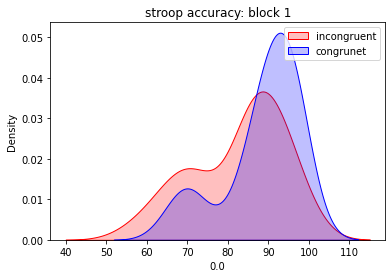

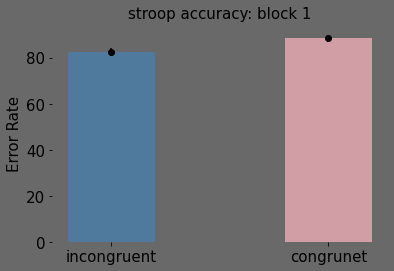

0:  0.7830159083425711 0.0785412361415424
1:  0.7148633721770646 0.08683882408723058

Paired t-test 

------------------  ------------
Sample size         31
Difference Mean      0.0681525
t                    7.85756
Df                  30
P-value (one-tail)   4.53632e-09
P-value (two-tail)   9.07265e-09
Lower 95.0%          0.0504389
Upper 95.0%          0.0858662
------------------  ------------


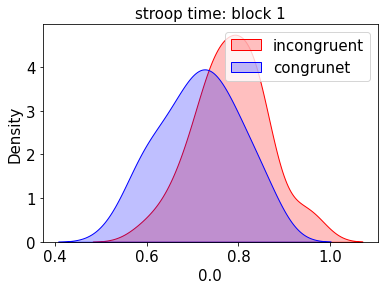

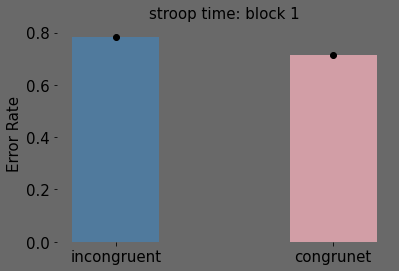

In [14]:
dfs1_accuracy_stroop = accuracyStroop(dfs1, 1)
dfs1_time_stroop = timeStroop(dfs1, 1)

0:  84.90322580645162 9.030890833539724
1:  88.74193548387096 7.080337760001208

Paired t-test 

------------------  ------------
Sample size         31
Difference Mean     -3.83871
t                   -3.7202
Df                  30
P-value (one-tail)   0.000409354
P-value (two-tail)   0.000818708
Lower 95.0%         -5.94604
Upper 95.0%         -1.73138
------------------  ------------


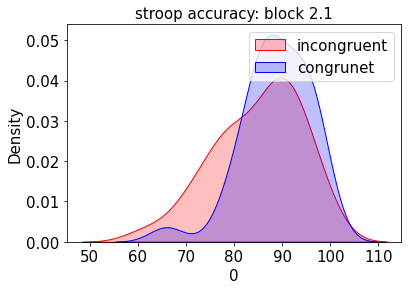

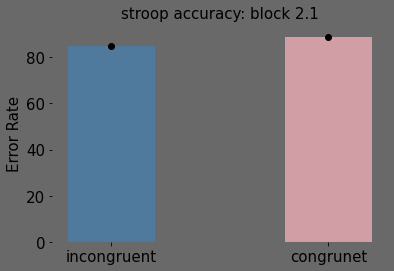

0:  0.771571651550524 0.07079679994212315
1:  0.7016859611802739 0.07968557995814435

Paired t-test 

------------------  ----------
Sample size         31
Difference Mean      0.0698857
t                    9.33499
Df                  30
P-value (one-tail)   1.108e-10
P-value (two-tail)   2.216e-10
Lower 95.0%          0.0545964
Upper 95.0%          0.085175
------------------  ----------


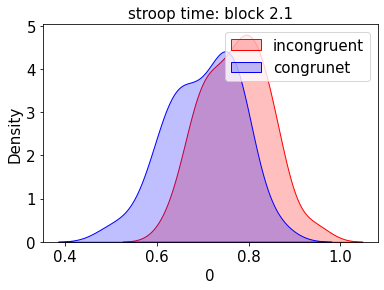

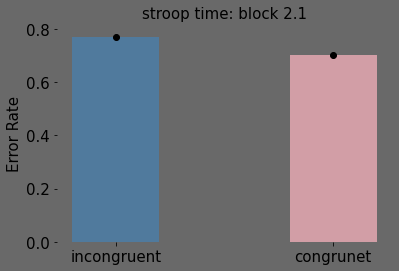

In [15]:
dfs2_1_accuracy_stroop = accuracyStroop(dfs2_1, 2.1)
dfs2_1_time_stroop = timeStroop(dfs2_1, 2.1)

0:  80.3225806451613 11.793747204272252
1:  84.3225806451613 10.737433264904586

Paired t-test 

------------------  -----------
Sample size         31
Difference Mean     -4
t                   -3.20787
Df                  30
P-value (one-tail)   0.00158676
P-value (two-tail)   0.00317351
Lower 95.0%         -6.54657
Upper 95.0%         -1.45343
------------------  -----------


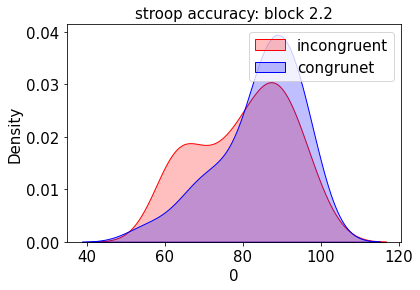

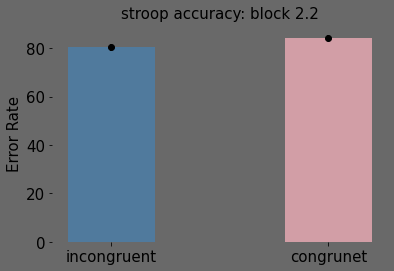

0:  0.7812221958375453 0.08284558409183895
1:  0.7188897054437985 0.08835864811098948

Paired t-test 

------------------  ------------
Sample size         31
Difference Mean      0.0623325
t                    9.51119
Df                  30
P-value (one-tail)   7.25363e-11
P-value (two-tail)   1.45073e-10
Lower 95.0%          0.0489483
Upper 95.0%          0.0757167
------------------  ------------


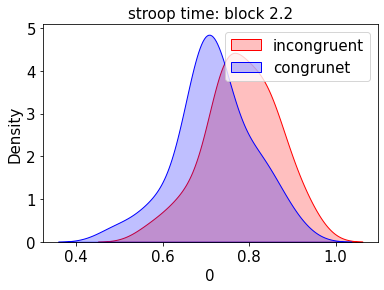

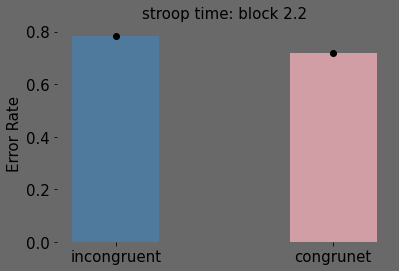

In [16]:
dfs2_2_accuracy_stroop = accuracyStroop(dfs2_2, 2.2)
dfs2_2_time_stroop = timeStroop(dfs2_2, 2.2)

0:  247.70967741935485 27.4520109140625
1:  261.4516129032258 22.54305319409569

Paired t-test 

------------------  -------------
Sample size          31
Difference Mean     -13.7419
t                    -4.93405
Df                   30
P-value (one-tail)    1.40321e-05
P-value (two-tail)    2.80641e-05
Lower 95.0%         -19.4299
Upper 95.0%          -8.05395
------------------  -------------


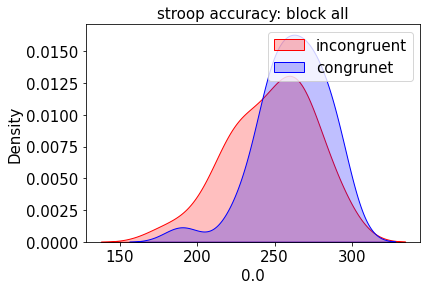

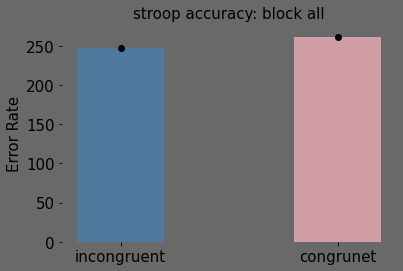

0:  0.7773329916273094 0.06759708592040847
1:  0.7110483364292857 0.07756204118051309

Paired t-test 

------------------  ------------
Sample size         31
Difference Mean      0.0662847
t                    9.87237
Df                  30
P-value (one-tail)   3.08272e-11
P-value (two-tail)   6.16543e-11
Lower 95.0%          0.0525725
Upper 95.0%          0.0799968
------------------  ------------


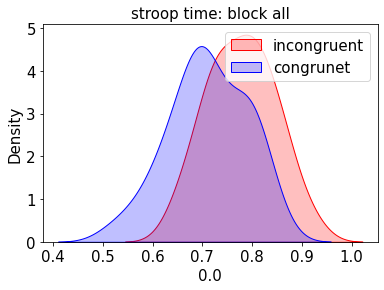

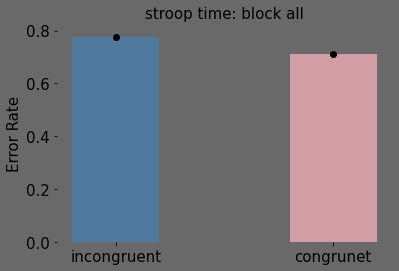

In [17]:
dfs_all = dfs1.append(dfs2_1, ignore_index=True)
dfs_all = dfs_all.append(dfs2_2, ignore_index=True)
dfs_all_accuracy_stroop = accuracyStroop(dfs_all, 'all')
dfs_all_time_stroop = timeStroop(dfs_all, 'all')

## error per participant

mean: 169.72043010752688 std: 15.927404004650587


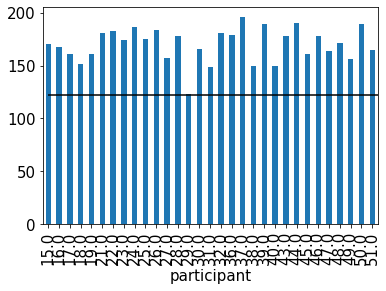

mean: 170.8709677419355 std: 18.86043819830966


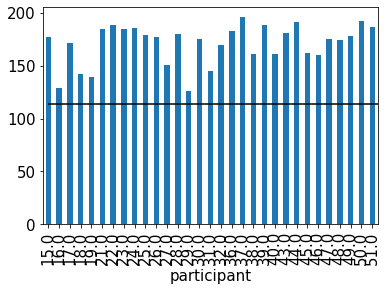

mean: 173.6451612903226 std: 15.177940982660273


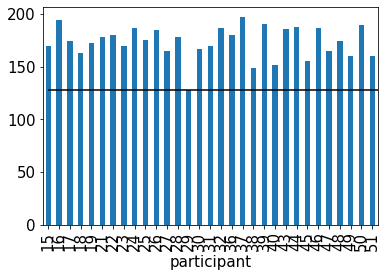

mean: 164.6451612903226 std: 21.46089216395997


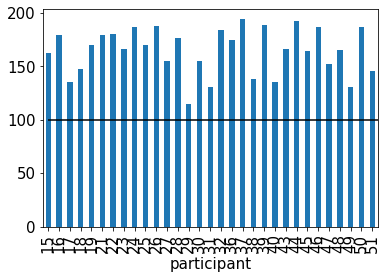

In [18]:
num_std_dist = 3
all_test = pd.concat([dfs1_accuracy_stroop, dfs2_1_accuracy_stroop, dfs2_2_accuracy_stroop], axis=1, ignore_index=True)
stroop_result_all = all_test.sum(axis=1) / 3
mean_result, std_result = stroop_result_all.mean(), stroop_result_all.std()
print("mean: " + str(mean_result) + " std: " + str(std_result))
stroop_result_all.plot.bar(x='participant')
plt.hlines(mean_result - num_std_dist*std_result, 0, 100, color='black')
plt.show()

stroop_result_1 = dfs1_accuracy_stroop.sum(axis=1)
mean_result, std_result = stroop_result_1.mean(), stroop_result_1.std()
print("mean: " + str(mean_result) + " std: " + str(std_result))
stroop_result_1.plot.bar(x='participant',)
plt.hlines(mean_result - num_std_dist*std_result, 0, 100, color='black')
plt.show()

stroop_result_2_1 = dfs2_1_accuracy_stroop.sum(axis=1)
mean_result, std_result = stroop_result_2_1.mean(), stroop_result_2_1.std()
print("mean: " + str(mean_result) + " std: " + str(std_result))
stroop_result_2_1.plot.bar(x='participant',)
plt.hlines(mean_result - num_std_dist*std_result, 0, 100, color='black')
plt.show()

stroop_result_2_2 = dfs2_2_accuracy_stroop.sum(axis=1)
mean_result, std_result = stroop_result_2_2.mean(), stroop_result_2_2.std()
print("mean: " + str(mean_result) + " std: " + str(std_result))
stroop_result_2_2.plot.bar(x='participant',)
plt.hlines(mean_result - num_std_dist*std_result, 0, 100, color='black')
plt.show()


# cleanup data - without stroop error and without trail

In [19]:
dfs1 = dfs1[(dfs1['stroop_anser.corr'] == true) & (dfs1['experiment'] != 0)]
dfs2_1 = dfs2_1[(dfs2_1['stroop_anser.corr'] == true) & (dfs2_1['experiment'] != 0)]              
dfs2_2 = dfs2_2[(dfs2_2['stroop_anser.corr'] == true) & (dfs2_2['experiment'] != 0)]

In [20]:
dfs2_1_accurcy1 = dfs2_1.pivot_table(index=["participant"], 
                                 columns=["test_uncertainty_anser_currect"], values=[],
                                                                 aggfunc=[len])
dfs2_2_accurcy1 = dfs2_2.pivot_table(index=["participant"], 
                                columns=["test_uncertainty_anser_currect"], values=[],
                                aggfunc=[len])
dfs2_accurcy_rate = (dfs2_1_accurcy1 + dfs2_2_accurcy1)
def succsesRare(x):
  number_of_all =  (x[('len', 1)] + x[('len',    0)]);
  prec = (x[('len', 1)] / number_of_all)
  print("mean:")
  display(prec.mean())
  print("std:")
  display(prec.std())

succsesRare(dfs2_accurcy_rate)
succsesRare(dfs2_1_accurcy1)
succsesRare(dfs2_2_accurcy1)

mean:


0.4742054856441418

std:


0.052045276297509824

mean:


0.4505229589254904

std:


0.07155840784848395

mean:


0.499248852023636

std:


0.06437128147483606

# part 1

## accurcy as function of common

mean        std
congruent common                          
0.0       infrequent  12.870968   2.929641
          widespread  55.000000  10.013324
1.0       infrequent  13.612903   2.691684
          widespread  59.645161   8.784640

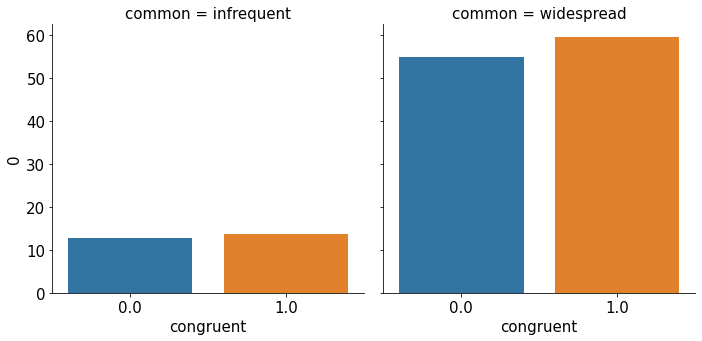

In [21]:
dfs1_accurcy = dfs1[dfs1["test_certainty_anser_currect"] == True].pivot_table(index=["participant"], 
                                columns=[congruent, common, "test_certainty_anser_currect"], values=[],
                                aggfunc=[len])
dfs1_accurcy.columns = dfs1_accurcy.columns.droplevel([0, 3])
x = dfs1[dfs1["test_certainty_anser_currect"] == True].pivot_table(index=["participant"], 
                                columns=["test_certainty_anser_currect"], values=[],
                                aggfunc=[len])
dfs1_accurcy_mean = pd.DataFrame({"mean": dfs1_accurcy.mean(), "std": dfs1_accurcy.std()})
sn.catplot(kind='bar', data=dfs1_accurcy.mean().reset_index(),
           col="common", x='congruent', y=0)
dfs1_accurcy_mean

## time as function of common 

congruent  common    
0.0        infrequent    4.608429
           widespread    4.176267
1.0        infrequent    4.643949
           widespread    4.477048
dtype: float64

congruent  common    
0.0        infrequent    0.605546
           widespread    0.514772
1.0        infrequent    0.768673
           widespread    0.463710
dtype: float64

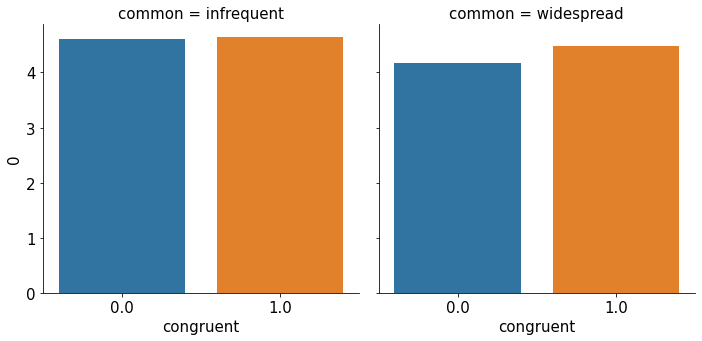

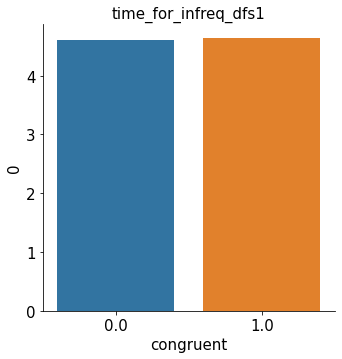

Ttest_relResult(statistic=-0.23221743890428762, pvalue=0.8179460009166372)

-0.30078095591763726

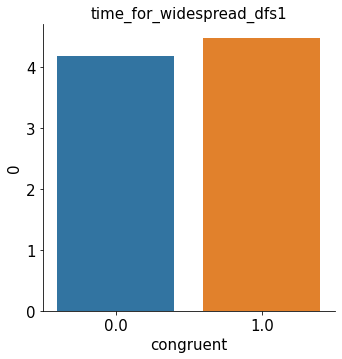

Ttest_relResult(statistic=-3.5946029055583564, pvalue=0.0011476378199807168)

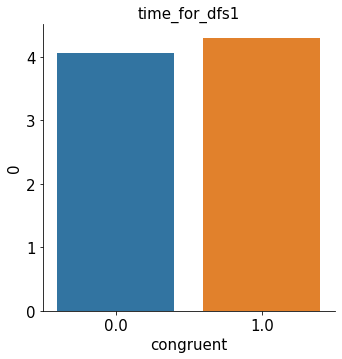

Ttest_relResult(statistic=-3.3840851480484586, pvalue=0.0020642999799113672)

In [22]:
dfs1_time = dfs1[(dfs1["test_certainty_anser_currect"] == True)].pivot_table(index=["participant"], 
                                columns=[congruent, common], values=["test_certainty_anser_time"],
                                aggfunc=[np.mean])
dfs1_time.columns = dfs1_time.columns.droplevel(level=[0,1])
display(dfs1_time.mean())
display(dfs1_time.std())
dfs1_time_mean = pd.DataFrame({"mean": dfs1_time.mean(), "std": dfs1_time.std()})
sn.catplot(kind='bar', data=dfs1_time.mean().reset_index(),
           col="common", x='congruent', y=0)
plt.show()

time_for_infreq_dfs1 = dfs1_time.xs("infrequent", level=common, axis=1).reset_index(drop=True)
sn.catplot(kind='bar', data=time_for_infreq_dfs1.mean().reset_index(),
            x='congruent', y=0)
plt.title("time_for_infreq_dfs1")
plt.show();
display(ttest_rel(time_for_infreq_dfs1[0.0], time_for_infreq_dfs1[1.0]))

time_for_widespread_dfs1 = dfs1_time.xs("widespread", level=common, axis=1).reset_index(drop=True)
display((time_for_widespread_dfs1[0.0] - time_for_widespread_dfs1[1.0]).mean())
sn.catplot(kind='bar', data=time_for_widespread_dfs1.mean().reset_index(),
            x='congruent', y=0)
plt.title("time_for_widespread_dfs1")
plt.show();
display(ttest_rel(time_for_widespread_dfs1[0.0], time_for_widespread_dfs1[1.0]))

time_for_dfs1 = dfs1[dfs1["test_certainty_anser_currect"] == True].pivot_table(index=["participant"], 
                                columns=[congruent], values=["test_certainty_mouse.time"],
                                aggfunc=[np.mean]).reset_index(drop=True)
time_for_dfs1.columns = time_for_dfs1.columns.droplevel(level=[0,1])
sn.catplot(kind='bar', data=time_for_dfs1.mean().reset_index(),
            x='congruent', y=0)
plt.title('time_for_dfs1')
plt.show();                    
display(ttest_rel(time_for_dfs1[0.0], time_for_dfs1[1.0]))                            

In [23]:
display(dfs1[(dfs1["test_certainty_anser_currect"] == True) & (dfs1[participant] == 36) & (dfs1["test_certainty_mouse.time"] != 0)])

,word,letterColor,corrAns,congruent,imageTrain,true_shaps,corrAnsLeft,corrAnsRight,common,experiment,...,test_certainty_mouse.rightButton,test_certainty_mouse.time,test_certainty_mouse.clicked_name,participant,session,date,expName,psychopyVersion,frameRate,Unnamed: 58
33,ירוק,green,x,1.0,Image_certainty//image190_alemnt12.jpg,12.jpg,one_down_left,one_middle_right,widespread,certainty,...,0.0,2.338028,one_middle_right,36.0,1.0,2022_Mar_07_1405,untitled_1,2020.2.6,60.020767,0.0
34,ירוק,green,x,1.0,Image_certainty//image169_alemnt11.jpg,11.jpg,one_middle_left,one_up_right,widespread,certainty,...,0.0,4.920660,one_up_right,36.0,1.0,2022_Mar_07_1405,untitled_1,2020.2.6,60.020767,0.0
35,אדום,red,z,1.0,Image_certainty//image192_alemnt11.jpg,11.jpg,one_up_left,one_down_right,widespread,certainty,...,0.0,5.304968,one_down_right,36.0,1.0,2022_Mar_07_1405,untitled_1,2020.2.6,60.020767,0.0
37,כחול,green,x,0.0,Image_certainty//image23_alemnt9.jpg,9.jpg,one_up_left,two_up_right,widespread,certainty,...,0.0,4.086928,two_up_right,36.0,1.0,2022_Mar_07_1405,untitled_1,2020.2.6,60.020767,0.0
39,כחול,blue,c,1.0,Image_certainty//image161_alemnt12.jpg,12.jpg,one_down_left,two_middle_right,widespread,certainty,...,0.0,5.636619,two_middle_right,36.0,1.0,2022_Mar_07_1405,untitled_1,2020.2.6,60.020767,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,אדום,blue,c,0.0,Image_certainty//image85_alemnt14.jpg,14.jpg,two_down_left,three_middle_right,widespread,certainty,...,0.0,2.091034,three_middle_right,36.0,1.0,2022_Mar_07_1405,untitled_1,2020.2.6,60.020767,0.0
227,ירוק,green,x,1.0,Image_certainty//image148_alemnt13.jpg,13.jpg,one_middle_left,two_up_right,widespread,certainty,...,0.0,2.206121,two_up_right,36.0,1.0,2022_Mar_07_1405,untitled_1,2020.2.6,60.020767,0.0
229,כחול,red,z,0.0,Image_certainty//image76_alemnt14.jpg,14.jpg,three_middle_left,two_middle_right,widespread,certainty,...,0.0,1.653376,two_middle_right,36.0,1.0,2022_Mar_07_1405,untitled_1,2020.2.6,60.020767,0.0
230,אדום,blue,c,0.0,Image_certainty//image43_alemnt11.jpg,11.jpg,two_down_left,one_up_right,widespread,certainty,...,0.0,6.237918,one_up_right,36.0,1.0,2022_Mar_07_1405,untitled_1,2020.2.6,60.020767,0.0


## cerate standart error on ber plot

In [24]:
def create_se_on_graph(x, se):
  for j, i in enumerate(x.facet_axis(0,0).patches):
    xpoint = [i.get_x() + (i.get_width()/2), i.get_x() + (i.get_width()/2)]
    ypoint = [i.get_height()-se[j], i.get_height()+se[j]]
    plt.plot(xpoint, ypoint,color="black", linewidth=3.0, alpha=0.6)

## anova accurcy as function of common & stroop

In [25]:
'''
this is a % of accurcy
'''
x = dfs1.pivot_table(index=["participant"], values=[],
                                columns=[congruent, common],
                                aggfunc=[len])
x.columns = x.columns.droplevel(level=[0])
dfs1_accurcy_div = dfs1_accurcy / x

In [26]:
'''
mean of effect common
'''
main_effect_common = dfs1[dfs1["test_certainty_anser_currect"] == True].pivot_table(index=["participant"], 
                                columns=[common, "test_certainty_anser_currect"], values=[],
                                aggfunc=[len])
main_effect_common.columns = main_effect_common.columns.droplevel([0, 2])
x1 = dfs1.pivot_table(index=["participant"], values=[],
                                columns=[common],
                                aggfunc=[len])
main_effect_common_dic  = main_effect_common / x1
display(main_effect_common_dic.mean())
display(main_effect_common_dic.std())

     common    
len  infrequent    0.780807
     widespread    0.835922
dtype: float64

     common    
len  infrequent    0.098932
     widespread    0.074834
dtype: float64

,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,ng2,eps
0,Frequency,0.089155,1,30,0.089155,17.755343,0.000212,0.000212,0.066441,1.0
1,Congruency,0.000150,1,30,0.000150,0.029164,0.865548,0.865548,0.000120,1.0
2,Frequency * Congruency,0.002289,1,30,0.002289,0.368693,0.548286,0.548286,0.001824,1.0


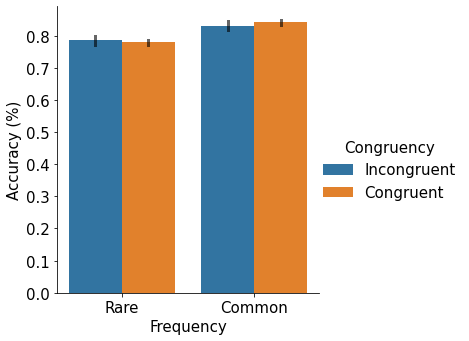

In [27]:
dfs1_accurcy_reset = dfs1_accurcy_div.reset_index()
dfs1_accurcy_melt = pd.melt(dfs1_accurcy_reset,id_vars=[("participant", '')],
              value_vars=[(0.0, 'infrequent'),(0.0, 'widespread'),(1.0, 'infrequent'), (1.0, 'widespread')])
dfs1_accurcy_melt = dfs1_accurcy_melt.rename(columns={("participant", ''): "participant"})

dfs1_accurcy_melt=dfs1_accurcy_melt.rename(columns = {'value':'Accuracy (%)'})

dfs1_accurcy_melt.loc[dfs1_accurcy_melt["congruent"] == 0.0,"congruent"] = 'Incongruent'
dfs1_accurcy_melt.loc[dfs1_accurcy_melt["congruent"] == 1.0, "congruent"] = 'Congruent'

dfs1_accurcy_melt.loc[dfs1_accurcy_melt["common"] == 'widespread',"common"] = 'Common'
dfs1_accurcy_melt.loc[dfs1_accurcy_melt["common"] == 'infrequent', "common"] = 'Rare'

dfs1_accurcy_melt=dfs1_accurcy_melt.rename(columns = {congruent:'Congruency'})
dfs1_accurcy_melt=dfs1_accurcy_melt.rename(columns = {common:'Frequency'})

display(pt.rm_anova(dv='Accuracy (%)', within=['Frequency', 'Congruency'], data=dfs1_accurcy_melt, subject="participant",
             detailed=True))
x = sn.catplot(kind='bar',
           data=dfs1_accurcy_melt, ci =None,
           x='Frequency', hue="Congruency", y='Accuracy (%)')

## base on file data standart error
se = [0.0141, 0.0135, 0.00844, 0.00758]
create_se_on_graph(x, se)

## anova time as function of common & stroop

In [28]:
main_effect_common = dfs1[(dfs1["test_certainty_anser_currect"] == True)].pivot_table(index=["participant"], 
                                columns=[common], values=["test_certainty_anser_time"],
                                aggfunc=[np.mean])
main_effect_common.columns = main_effect_common.columns.droplevel(level=[0,1])
display("common main", main_effect_common.mean())
display("common std", main_effect_common.std())

main_effect_common = dfs1[(dfs1["test_certainty_anser_currect"] == True)].pivot_table(index=["participant"], 
                                columns=[congruent], values=["test_certainty_anser_time"],
                                aggfunc=[np.mean])
main_effect_common.columns = main_effect_common.columns.droplevel(level=[0,1])
display("inhibition main", main_effect_common.mean())
display("inhibition std", main_effect_common.std())

'common main'

common
infrequent    4.627556
widespread    4.331977
dtype: float64

'common std'

common
infrequent    0.558899
widespread    0.432958
dtype: float64

'inhibition main'

congruent
0.0    4.255413
1.0    4.505923
dtype: float64

'inhibition std'

congruent
0.0    0.455368
1.0    0.456628
dtype: float64

,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,ng2,eps
0,common,2.781285,1,30,2.781285,11.436316,0.002018,0.002018,0.060584,1.0
1,congruent,0.876513,1,30,0.876513,4.370313,0.045145,0.045145,0.019919,1.0
2,common * congruent,0.545315,1,30,0.545315,2.015058,0.166053,0.166053,0.012487,1.0


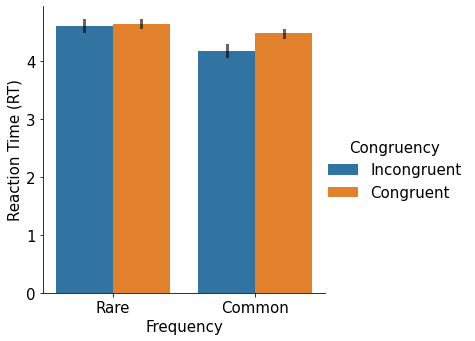

In [29]:
dfs1_time_reset = dfs1_time.reset_index()                         
dfs1_time_melt = pd.melt(dfs1_time_reset, id_vars=[("participant", '')],
              value_vars=[(0.0, 'infrequent'),(0.0, 'widespread'),(1.0, 'infrequent'), (1.0, 'widespread')])
dfs1_time_melt = dfs1_time_melt.rename(columns={("participant", ''): "participant"})
display(pt.rm_anova(dv='value', within=['common', 'congruent'], data=dfs1_time_melt, subject="participant",
            detailed=True))
dfs1_time_melt=dfs1_time_melt.rename(columns = {'value':'Reaction Time (RT)'})

dfs1_time_melt.loc[dfs1_time_melt["congruent"] == 0.0,"congruent"] = 'Incongruent'
dfs1_time_melt.loc[dfs1_time_melt["congruent"] == 1.0, "congruent"] = 'Congruent'

dfs1_time_melt=dfs1_time_melt.rename(columns = {congruent:'Congruency'})
dfs1_time_melt.loc[dfs1_time_melt["common"] == 'widespread',"common"] = 'Common'
dfs1_time_melt.loc[dfs1_time_melt["common"] == 'infrequent', "common"] = 'Rare'

dfs1_time_melt=dfs1_time_melt.rename(columns = {congruent:'Congruency'})
dfs1_time_melt=dfs1_time_melt.rename(columns = {common:'Frequency'})

x = sn.catplot(kind='bar',
           data=dfs1_time_melt, ci =None,
           x='Frequency', hue="Congruency", y='Reaction Time (RT)')
se = [0.0879495, 0.088717, 0.06319, 0.0585]
create_se_on_graph(x, se)

## coraltion with question

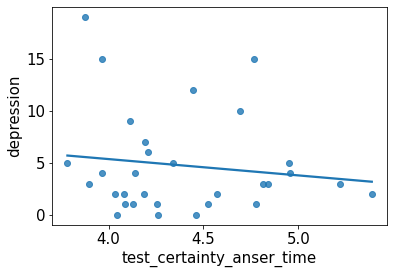

depression


(-0.1339051120258229, 0.4726596602778185)

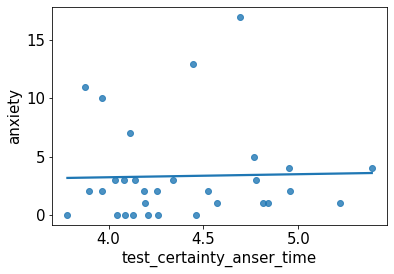

anxiety


(0.026319657636807214, 0.8882303947571571)

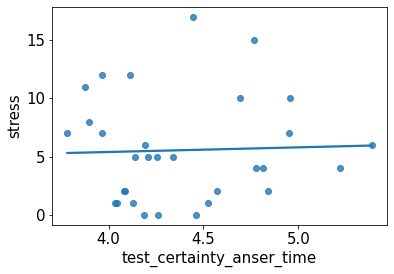

stress


(0.03648080422477647, 0.8455227367319744)

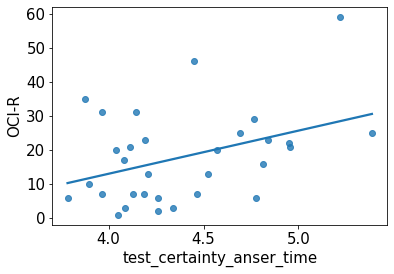

OCI-R


(0.3898409715396775, 0.03016307896027895)

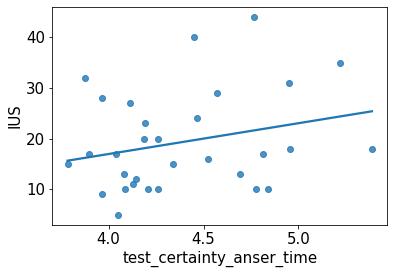

IUS


(0.258002531198871, 0.16111801598813447)

In [30]:
dfs1_time1 = dfs1[(dfs1["test_certainty_anser_currect"] == True)].pivot_table(index=["participant"], 
                                columns=[], values=["test_certainty_anser_time"],
                                aggfunc=[np.mean])
dfs1_time1.columns = dfs1_time1.columns.droplevel(level=[0])
def corraltion1(data, name):
  path_f = path + "/inhibitory_control&uncertainty&check_score.xlsx"
  QR_score = pd.concat([pd.read_excel(path_f, sheet_name='Sheet0',na_values="").fillna(value = 0)])
  # pilot and drop out participant
  for i in [52, 20, 41, 12, 13]:
    QR_score = QR_score.drop(QR_score[QR_score['participant'] == i].index)
  QR_score = QR_score.sort_values(by=['participant'], ignore_index=True)
  a = pd.DataFrame(QR_score).merge(data, how='left', on='participant')
  for i in ['depression', 'anxiety', 'stress', 'OCI-R', 'IUS']:
      test_value = i
      #a=a.rename(columns = {'test_certainty_anser_time':'Reaction Time (RT)'})
      #a=a.rename(columns = {'infrequent':'Reaction Time (RT)'})
      #name = 'Reaction Time (RT)'
      # sn.catplot(data=a,
      #          x=name, y=test_value)
      sn.regplot(data=a, ci=None,
                x=name, y=test_value)
      plt.show()
      print(i)
      display(pearsonr(a[test_value], a[name]))
corraltion1(dfs1_time1, 'test_certainty_anser_time')

##corraltion RT to true & rare

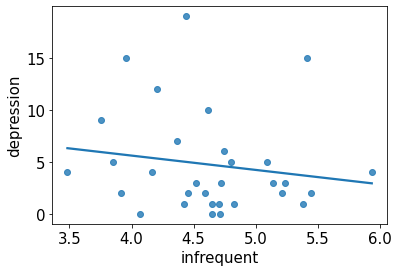

depression


(-0.15848233978582466, 0.39447414018035776)

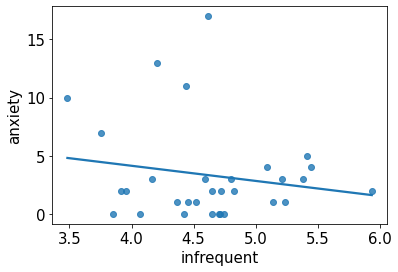

anxiety


(-0.17536102392406144, 0.34538158069059943)

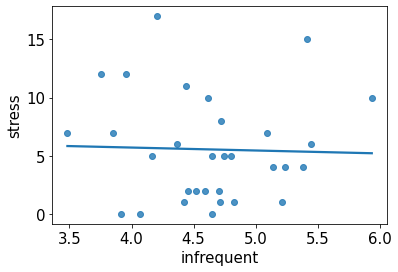

stress


(-0.031057262330177804, 0.8682724150679498)

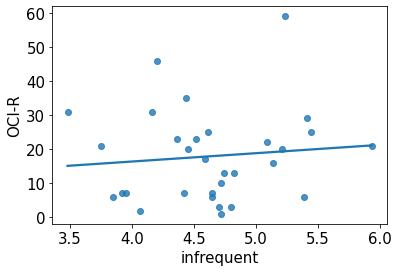

OCI-R


(0.10168973922043434, 0.5862130361852931)

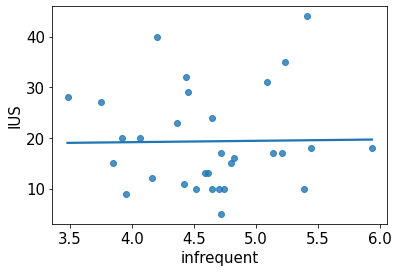

IUS


(0.015209801419681729, 0.9352756832791087)

In [31]:
x = dfs1[(dfs1["test_certainty_anser_currect"] == True)].pivot_table(index=["participant"], 
                                columns=[common], values=["test_certainty_anser_time"],
                                aggfunc=[np.mean])
x.columns = x.columns.droplevel(level=[0, 1])
x.drop('widespread', inplace=True, axis=1)
corraltion1(x, 'infrequent')

## corraltion for RT to true & common 

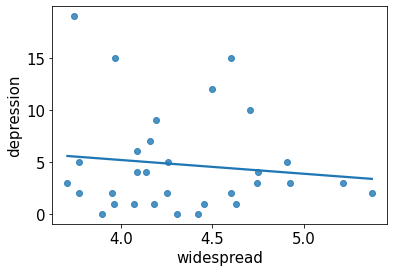

depression


(-0.11744744364010593, 0.5291978180869511)

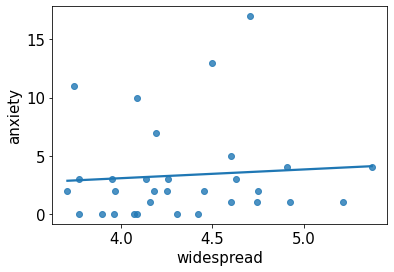

anxiety


(0.0783239659813448, 0.6753527611850495)

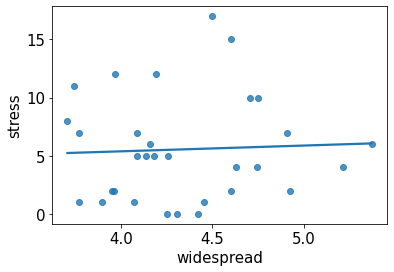

stress


(0.047081426124736404, 0.8014235154831872)

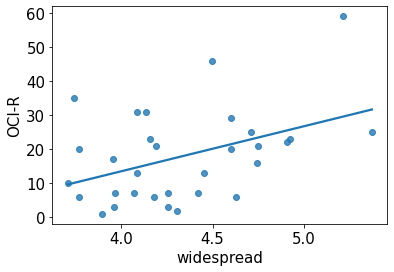

OCI-R


(0.424237892262645, 0.017380009452684506)

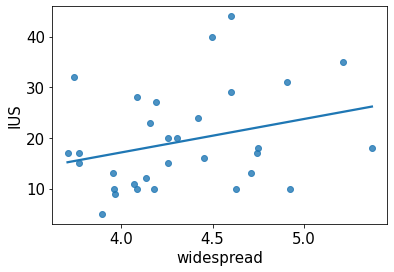

IUS


(0.291855813790045, 0.11113469361247431)

In [32]:
x = dfs1[(dfs1["test_certainty_anser_currect"] == True)].pivot_table(index=["participant"], 
                                columns=[common], values=["test_certainty_anser_time"],
                                aggfunc=[np.mean])
x.columns = x.columns.droplevel(level=[0, 1])
x.drop('infrequent', inplace=True, axis=1)
corraltion1(x, 'widespread')

# part 2.1

## accurracy as function of common - data

In [33]:
display(dfs2_1[dfs2_1["test_uncertainty_anser_currect"] == True].pivot_table(index=["participant"], 
                                                  columns=[common, congruent],values=[], aggfunc=[len]))

len                       
common      infrequent       widespread      
congruent            0     1          0     1
participant                                  
15                14.0  14.0       28.0  30.0
16                16.0  16.0       39.0  31.0
17                 9.0  13.0       38.0  33.0
18                12.0  13.0       23.0  29.0
19                15.0  17.0       32.0  35.0
21                 7.0   5.0       31.0  27.0
22                 7.0   4.0       37.0  35.0
23                 4.0   4.0       28.0  24.0
24                17.0  19.0       39.0  41.0
25                14.0   8.0       25.0  24.0
26                17.0  19.0       33.0  22.0
27                 2.0   6.0       33.0  27.0
28                 1.0   2.0       37.0  34.0
29                 4.0   7.0       17.0  18.0
30                 4.0   2.0       30.0  26.0
31                14.0  16.0       23.0  28.0
32                 8.0  12.0       43.0  27.0
36                12.0  12.0       21.0  27.0
37                 8.0   5.0       43.0  34.0
38                 6.0  11.0       25.0  20.0
39                14.0  18.0       35.0  43.0
40                 7.0  13.0       19.0  21.0
43                10.0   9.0       25.0  33.0
44                 2.0   6.0       33.0  32.0
45                 8.0   6.0       36.0  24.0
46                 5.0   NaN       44.0  29.0
47                10.0  16.0       24.0  34.0
48                 3.0   5.0       25.0  20.0
49                 2.0   4.0       32.0  27.0
50                 9.0   8.0       36.0  38.0
51                 6.0  13.0       30.0  29.0

## error as function of common

mean       std
congruent common                         
0         infrequent   8.655172  4.458346
          widespread  37.096774  5.872846
1         infrequent   8.758621  4.954473
          widespread  41.677419  4.826228

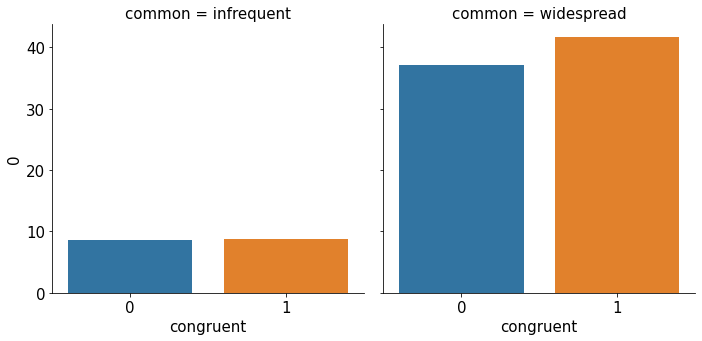

In [34]:
dfs2_1_accurcy = dfs2_1[dfs2_1["test_uncertainty_anser_currect"] == False].pivot_table(index=["participant"], 
                                columns=[congruent, common, "test_uncertainty_anser_currect"], values=[],
                                aggfunc=[len])
dfs2_1_accurcy.columns = dfs2_1_accurcy.columns.droplevel([0, 3])

display(pd.DataFrame({"mean":dfs2_1_accurcy.mean(), "std": dfs2_1_accurcy.std()}))
sn.catplot(kind='bar', data=dfs2_1_accurcy.mean().reset_index(),
           col="common", x='congruent', y=0)

## time as fonction of common & stroop

mean       std
congruent common                        
0         infrequent  1.678232  0.434169
          widespread  1.537670  0.252510
1         infrequent  1.738415  0.531630
          widespread  1.566228  0.250044

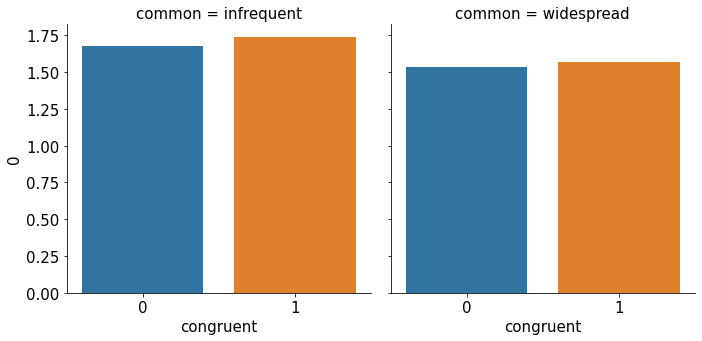

In [35]:
dfs2_1_time = (dfs2_1[dfs2_1["test_uncertainty_anser_currect"] == True]).pivot_table(index=["participant"], 
                                columns=[congruent, common], values=["test_mouse_anser_rual.time"],
                                aggfunc=[np.mean])
dfs2_1_time.columns = dfs2_1_time.columns.droplevel(level=[0,1])

dfs2_1_time_mean = pd.DataFrame({"mean": dfs2_1_time.mean(), "std": dfs2_1_time.std()})
sn.catplot(kind='bar', data=dfs2_1_time.mean().reset_index(),
           col="common", x='congruent', y=0)
dfs2_1_time_mean

##anova kind of error as function of the currect answer

,word,letterColor,corrAns,congruent,imageTrain,true_shaps,corrAnsRual,common,common_new,experiment,...,date,expName,psychopyVersion,frameRate,test_certainty_anser_time,finalClickTime,text_5.started,text_5.stopped,certainty,infrequnce_error
21,ירוק,green,x,1,Image_uncertainty_1//image103_alemnt-1.jpg,-1.jpg,three_right,infrequent,N_infrequent,uncertainty,...,2021_Dec_29_1834,untitled_2,2020.2.6,59.813621,1.320686,1.319803,319.812712,None,NaN,true_answer
22,כחול,blue,c,1,Image_uncertainty_1//image158_alemnt7.jpg,7.jpg,three_down,widespread,widespread,uncertainty,...,2021_Dec_29_1834,untitled_2,2020.2.6,59.813621,1.669263,1.667821,328.028305,None,NaN,wides_answer
23,אדום,green,x,0,Image_uncertainty_1//image54_alemnt1.jpg,1.jpg,one_up,widespread,widespread,uncertainty,...,2021_Dec_29_1834,untitled_2,2020.2.6,59.813621,2.104552,2.104099,337.111884,None,NaN,true_answer
24,אדום,green,x,0,Image_uncertainty_1//image90_alemnt8.jpg,8.jpg,four_down,widespread,widespread,uncertainty,...,2021_Dec_29_1834,untitled_2,2020.2.6,59.813621,1.854934,1.852075,346.562372,None,NaN,infreq_answer
25,ירוק,green,x,1,Image_uncertainty_1//image169_alemnt8.jpg,8.jpg,four_down,widespread,widespread,uncertainty,...,2021_Dec_29_1834,untitled_2,2020.2.6,59.813621,2.588370,0.000000,355.842346,None,NaN,wides_answer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228,כחול,red,z,0,Image_uncertainty_1//image10_alemnt-1.jpg,-1.jpg,three_right,infrequent,NaN,uncertainty,...,2022_Jul_19_1932,untitled_2,2020.2.6,60.047293,1.983120,1.981962,2264.426346,None,NaN,true_answer
229,ירוק,red,z,0,Image_uncertainty_1//image26_alemnt3.jpg,3.jpg,three_up,widespread,NaN,uncertainty,...,2022_Jul_19_1932,untitled_2,2020.2.6,60.047293,0.851711,0.851090,2271.503936,None,NaN,true_answer
230,כחול,green,x,0,Image_uncertainty_1//image89_alemnt3.jpg,3.jpg,three_up,widespread,NaN,uncertainty,...,2022_Jul_19_1932,untitled_2,2020.2.6,60.047293,2.466125,2.465198,2280.679605,None,NaN,wides_answer
231,אדום,red,z,1,Image_uncertainty_1//image177_alemnt8.jpg,8.jpg,four_down,widespread,NaN,uncertainty,...,2022_Jul_19_1932,untitled_2,2020.2.6,60.047293,1.683353,1.681726,2288.589761,None,NaN,true_answer


,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,ng2,eps
0,common,37460.992759,1,28,37460.992759,10869.510852,8.177785e-38,8.177785e-38,0.568068,1.000000
1,infrequnce_error,5073.380690,2,56,2536.690345,4.314980,1.807656e-02,3.988621e-02,0.151187,0.587227
2,common * infrequnce_error,-5618.138966,2,56,-2809.069483,25.728621,1.187587e-08,1.187587e-08,-0.245705,1.000000


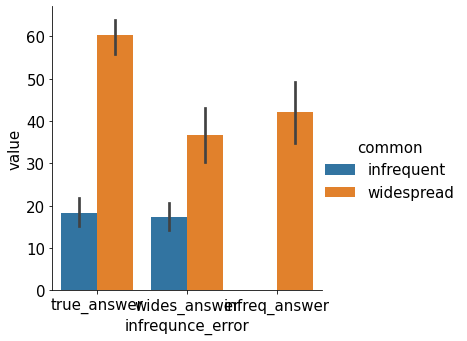

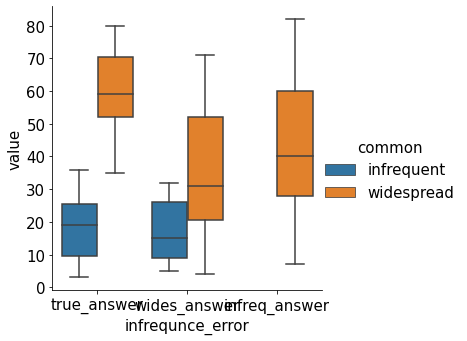

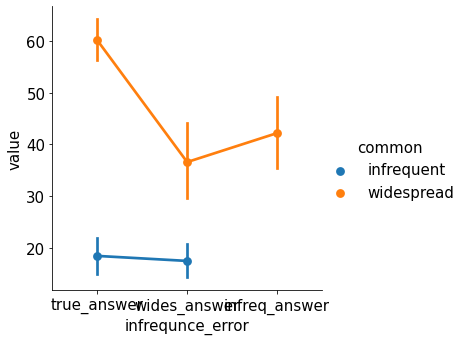

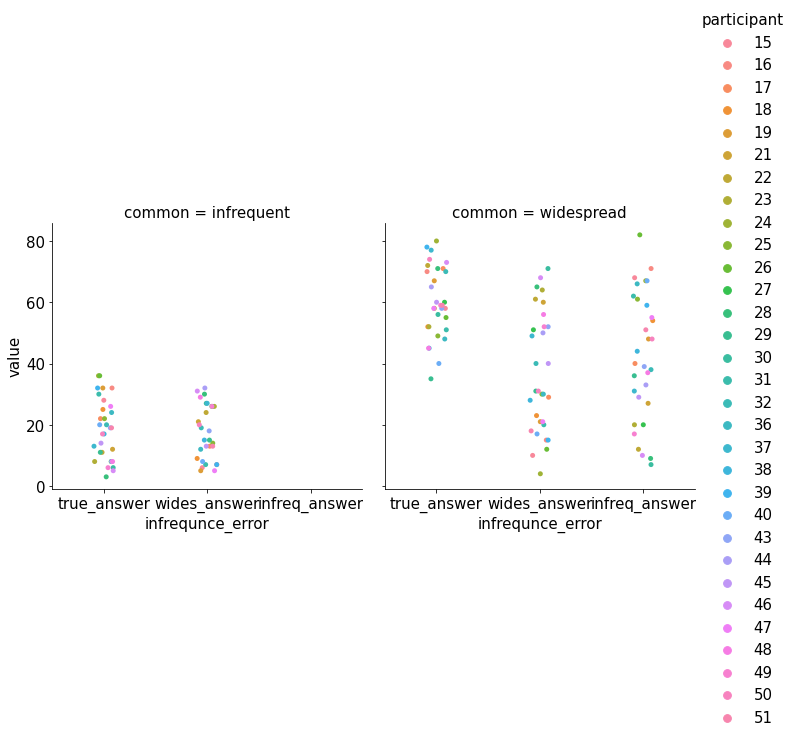

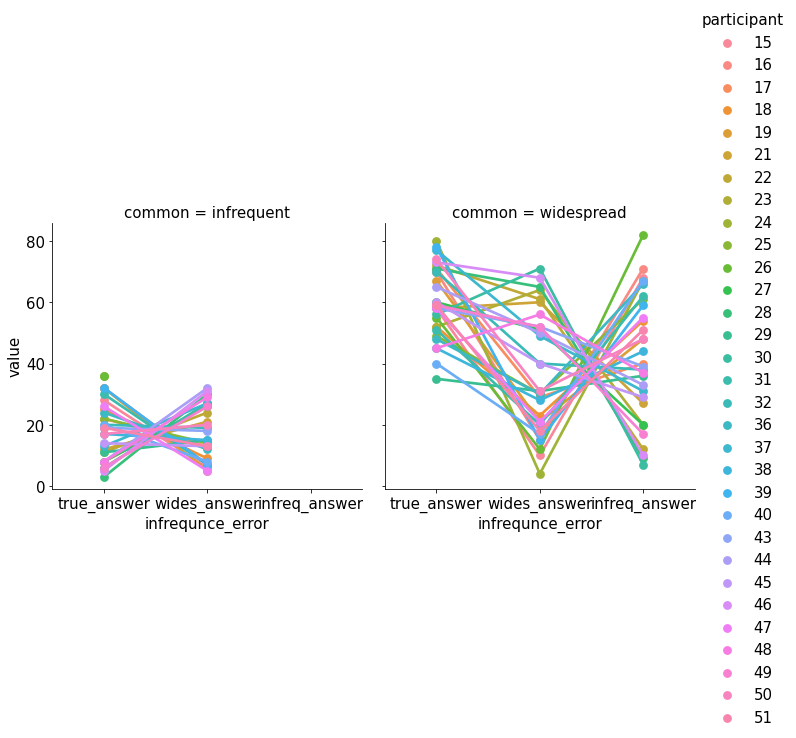

In [36]:
dfs2_1[infrequnce_error] = np.select([(dfs2_1[experiment] == "uncertainty") &
                                        (dfs2_1[click_name] == "three_right")], ["infreq_answer"], default="wides_answer")
dfs2_1.loc[dfs2_1["test_uncertainty_anser_currect"] == True, infrequnce_error] = "true_answer"
display(dfs2_1)
dfs2_1_accurcy = dfs2_1.pivot_table(index=["participant"], 
                                columns=[common, infrequnce_error], values=[],
                                aggfunc=[len])
dfs2_1_accurcy.columns = dfs2_1_accurcy.columns.droplevel(level=[0])
dfs2_1_accurcy = dfs2_1_accurcy.reset_index()
dfs2_1_accurcy_melt = pd.melt(dfs2_1_accurcy, id_vars=[dfs2_1_accurcy.columns[0]],
              value_vars=[dfs2_1_accurcy.columns[i] for i in range(1,len(dfs2_1_accurcy.columns))])
dfs2_1_accurcy_melt = dfs2_1_accurcy_melt.rename(columns={("participant", ''): "participant"})
display(pt.rm_anova(dv='value', within=['common', 'infrequnce_error'], data=dfs2_1_accurcy_melt, subject="participant",
             detailed=True))
anovagraphs(dfs2_1_accurcy_melt, x_val=infrequnce_error)


## anova 3-way kind of error as function of currect answer, common & stroop 

In [37]:
mean_kind_answer = dfs2_1.pivot_table(index=["participant"],columns=infrequnce_error,aggfunc=[len], values=[])
mean_kind_answer.columns = mean_kind_answer.columns.droplevel(level=[0])
print(mean_kind_answer.mean())
print(mean_kind_answer.std())
res = stat()
res.ttest(df=mean_kind_answer, test_type=1, mu=6.6, res='true_answer')
print(res.summary)

infrequnce_error
infreq_answer    42.193548
true_answer      78.580645
wides_answer     52.870968
dtype: float64
infrequnce_error
infreq_answer    20.799711
true_answer      16.068134
wides_answer     28.690001
dtype: float64

One Sample t-test 

------------------  ------------
Sample size         31
Mean                78.5806
t                   24.942
Df                  30
P-value (one-tail)   6.46223e-22
P-value (two-tail)   1.29245e-21
Lower 95.0%         72.6868
Upper 95.0%         84.4745
------------------  ------------


In [38]:
dfs2_1_accurcy_3_way = dfs2_1.pivot_table(
                                index=["participant"], 
                                columns=[congruent, common, infrequnce_error], values=[],
                                aggfunc=[len], fill_value=0).fillna(0)
dfs2_1_accurcy_3_way.columns = dfs2_1_accurcy_3_way.columns.droplevel(level=[0])

infreq_answer_zero_row = pd.DataFrame([{participant:i,congruent:c, common:'infrequent',
                                        infrequnce_error:'infreq_answer', 'value':0} 
                                       for i in dfs2_1_accurcy_3_way.index for c in [0, 1]])

dfs2_1_accurcy_3_way = dfs2_1_accurcy_3_way.reset_index()
len_of_answer_common = dfs2_1.pivot_table(index=["participant"], 
                                columns=[congruent, common], values=[],
                                aggfunc=[len], fill_value=0).fillna(0)
len_of_answer_common.columns = len_of_answer_common.columns.droplevel(level=[0])

x = dfs2_1_accurcy_3_way
dfs2_1_accurcy_3_way_copy_without_precent = dfs2_1_accurcy_3_way.copy()
s1 = pd.DataFrame(x[(0, 'widespread', 'true_answer')])
x[(0, 'widespread', 'true_answer')]  = (s1.values / pd.DataFrame(len_of_answer_common[(0, "widespread")]).values)
s2 = pd.DataFrame(x[(1, 'widespread', 'true_answer')])
x[(1, 'widespread',   'true_answer')] = (s2.values / pd.DataFrame(len_of_answer_common[(1, "widespread")]).values)
s1 = pd.DataFrame(x[(0, 'infrequent', 'true_answer')])
x[(0, 'infrequent', 'true_answer')]  = (s1.values / pd.DataFrame(len_of_answer_common[(0, "infrequent")]).values)
s2 =pd.DataFrame(x[(1, 'infrequent', 'true_answer')])
x[(1, 'infrequent',   'true_answer')] = (s2.values / pd.DataFrame(len_of_answer_common[(1, "infrequent")]).values)

#display((dfs2_1_accurcy_3_way.xs(('true_answer'), level=infrequnce_error, axis=1)))
#display((dfs2_1_accurcy_3_way.xs(('infreq_answer'), level=infrequnce_error, axis=1)))
#display((dfs2_1_accurcy_3_way.xs(('wides_answer'), level=infrequnce_error, axis=1)))

dfs2_1_accurcy_melt_3_way = pd.melt(dfs2_1_accurcy_3_way, id_vars=[dfs2_1_accurcy_3_way.columns[0]],
              value_vars=[dfs2_1_accurcy_3_way.columns[i] for i in range(1, len(dfs2_1_accurcy_3_way.columns))])
dfs2_1_accurcy_melt_3_way = dfs2_1_accurcy_melt_3_way.rename(columns={("participant", '', ''): "participant"})
dfs2_1_accurcy_melt_3_way = pd.concat([dfs2_1_accurcy_melt_3_way , infreq_answer_zero_row], ignore_index=True)


## step 1: anova for true answer : common & conguent (%)

                    Anova
                 F Value Num DF  Den DF Pr > F
----------------------------------------------
congruent         0.3225 1.0000 30.0000 0.5743
common            3.7292 1.0000 30.0000 0.0630
congruent:common  4.7858 1.0000 30.0000 0.0366



,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,ng2,eps
0,common,0.289544,1,30,0.289544,3.729151,0.062968,0.062968,0.053708,1.0
1,congruent,0.003135,1,30,0.003135,0.322506,0.574332,0.574332,0.000614,1.0
2,common * congruent,0.036340,1,30,0.036340,4.785803,0.036622,0.036622,0.007073,1.0


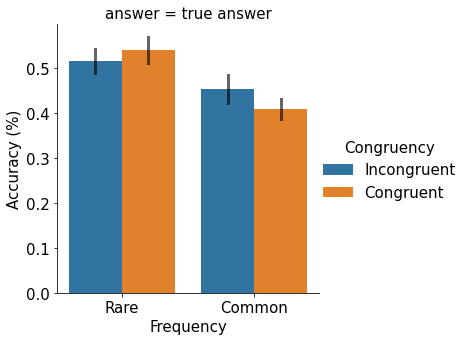

In [39]:
dfs2_1_accurcy_melt_3_way_copy = dfs2_1_accurcy_melt_3_way.copy()
data_true_answer_dfs_2_1 = dfs2_1_accurcy_melt_3_way_copy[(dfs2_1_accurcy_melt_3_way_copy[infrequnce_error] == 'true_answer')]
aov = AnovaRM(
    data_true_answer_dfs_2_1,
    depvar='value',
    subject="participant",
    within=['congruent', 'common']
    ).fit()
print(aov)
display(pt.rm_anova(dv='value', within=['common', 'congruent'],
  data=data_true_answer_dfs_2_1,
  subject="participant", detailed=True))
x=dfs2_1_accurcy_melt_3_way_copy.rename(columns = {'value':'Accuracy (%)'})
x=x.rename(columns = {infrequnce_error:'answer'})
x.loc[x["congruent"] == 0.0,"congruent"] = 'Incongruent'
x.loc[x["congruent"] == 1.0, "congruent"] = 'Congruent'
x=x.rename(columns = {congruent:'Congruency'})
x.loc[x["answer"] == 'true_answer',"answer"] = 'true answer'

x.loc[x["common"] == 'widespread',"common"] = 'Common'
x.loc[x["common"] == 'infrequent', "common"] = 'Rare'

x=x.rename(columns = {common:'Frequency'})

z = sn.catplot(kind='bar', 
           data=x[x['answer'] == 'true answer'], ci=None,
           x='Frequency', col='answer', hue='Congruency', y='Accuracy (%)')

se = [0.02767, 0.0302818, 0.029396, 0.02266]
create_se_on_graph(z, se)

## steps 2: t-test for widsp & true answer : conguent (%)

'mean:'

       congruent
value  0            0.453406
       1            0.409112
dtype: float64

'std:'

       congruent
value  0            0.081502
       1            0.068242
dtype: float64

                 Anova
          F Value Num DF  Den DF Pr > F
---------------------------------------
congruent  7.7550 1.0000 30.0000 0.0092



,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,eta-square
0,congruent,0,1,True,True,2.784779,30.0,two-sided,0.009188,4.786,0.079882



Paired t-test 

------------------  -----------
Sample size         31
Difference Mean      0.0442941
t                    2.78478
Df                  30
P-value (one-tail)   0.00459423
P-value (two-tail)   0.00918847
Lower 95.0%          0.0118101
Upper 95.0%          0.076778
------------------  -----------


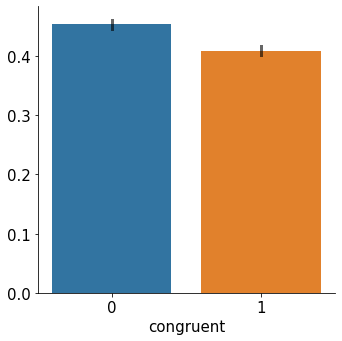

In [40]:
def ttest_for_true_answer(infrequnce):
  dfs_2_1_true_answer_common_a = dfs2_1_accurcy_melt_3_way_copy[(dfs2_1_accurcy_melt_3_way_copy[infrequnce_error] == 'true_answer') &
                              (dfs2_1_accurcy_melt_3_way_copy[common] == infrequnce)]                   
  mean_true = dfs_2_1_true_answer_common_a.pivot_table(
    index=["participant"], columns=[congruent], values=['value'],fill_value=0)
  display('mean:', mean_true.mean())
  display('std:', mean_true.std())

  aov = AnovaRM(
    dfs_2_1_true_answer_common_a,
    depvar='value',
    subject="participant",
    within=['congruent']
    ).fit()
  print(aov)
  display(pt.pairwise_tests(data=dfs_2_1_true_answer_common_a, dv='value', 
                         within=['congruent'], subject="participant", effsize='eta-square'))
  dfs_2_1_true_answer_common = dfs_2_1_true_answer_common_a.pivot_table(index=["participant"], 
                                columns=[congruent],values="value").fillna(0)                             
  res = stat()
  res.ttest(dfs_2_1_true_answer_common, res=[0,1], test_type=3)                
  print(res.summary)
  z = sn.catplot(kind='bar', ci=None,
           data= dfs_2_1_true_answer_common)
  # se by file for widspread. 
  se = [0.007844493, 0.00784]
  create_se_on_graph(z, se)

ttest_for_true_answer('widespread')

'mean:'

       congruent
value  0            0.515812
       1            0.539994
dtype: float64

'std:'

       congruent
value  0            0.275923
       1            0.287431
dtype: float64

                 Anova
          F Value Num DF  Den DF Pr > F
---------------------------------------
congruent  0.6769 1.0000 30.0000 0.4171



,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,eta-square
0,congruent,0,1,True,True,-0.822738,30.0,two-sided,0.417149,0.262,0.001839



Paired t-test 

------------------  ----------
Sample size         31
Difference Mean     -0.0241829
t                   -0.822738
Df                  30
P-value (one-tail)   0.208574
P-value (two-tail)   0.417149
Lower 95.0%         -0.0842118
Upper 95.0%          0.035846
------------------  ----------


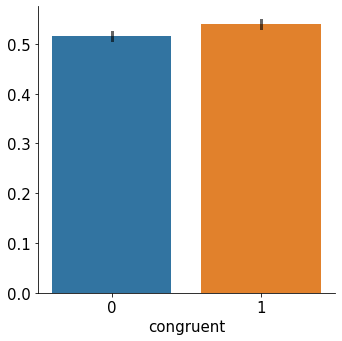

In [41]:
ttest_for_true_answer('infrequent')

## step 3: anova for error - widsp : kind of error & stroop

            congruent
sum  value  0            37.096774
            1            41.677419
dtype: float64

            congruent
sum  value  0            5.872846
            1            4.826228
dtype: float64

                         Anova
                           F Value Num DF  Den DF Pr > F
--------------------------------------------------------
congruent                  14.3741 1.0000 30.0000 0.0007
infrequnce_error            0.6240 1.0000 30.0000 0.4358
congruent:infrequnce_error  0.2704 1.0000 30.0000 0.6069



,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,ng2,eps
0,congruent,162.612903,1,30,162.612903,14.374109,0.000675,0.000675,0.012319,1.0
1,infrequnce_error,244.161290,1,30,244.161290,0.624036,0.435751,0.435751,0.018383,1.0
2,congruent * infrequnce_error,3.903226,1,30,3.903226,0.270371,0.606899,0.606899,0.000299,1.0


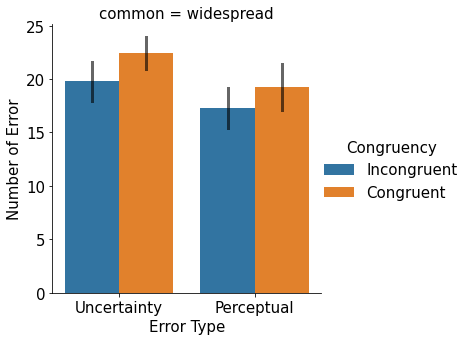

In [42]:
dfs2_1_accurcy_melt_3_way_copy = dfs2_1_accurcy_melt_3_way.copy()
x_2_1 = dfs2_1_accurcy_melt_3_way_copy[(dfs2_1_accurcy_melt_3_way_copy['common'] == "widespread") &
                              (dfs2_1_accurcy_melt_3_way_copy[infrequnce_error] != "true_answer")]
mean_inhibition_pivot = x_2_1.pivot_table(index=["participant"], 
                                columns=[congruent], values=['value'],aggfunc=[sum],
                                fill_value=0)
display(mean_inhibition_pivot.mean())
display(mean_inhibition_pivot.std())
                            
aov = AnovaRM(
    x_2_1,
    depvar='value',
    subject="participant",
    within=['congruent', infrequnce_error]
    ).fit()
print(aov)
display(pt.rm_anova(dv='value', within=['congruent', infrequnce_error],
  data=x_2_1,
  subject="participant", detailed=True))

x=x_2_1.rename(columns = {'value':'Number of Error'})
x=x.rename(columns = {infrequnce_error:'kind of error'})
x.loc[x['kind of error'] == 'infreq_answer',"kind of error"] = 'Uncertainty'
x.loc[x['kind of error'] == 'wides_answer',"kind of error"] = 'Perceptual'
x.loc[x["congruent"] == 0.0,"congruent"] = 'Incongruent'
x.loc[x["congruent"] == 1.0, "congruent"] = 'Congruent' 
x=x.rename(columns = {congruent:'Congruency'})
x=x.rename(columns = {"kind of error":'Error Type'})

z = sn.catplot(kind='bar', ci=None,
           data=x,
           
           col='common', x='Error Type', hue='Congruency', y='Number of Error')
se = [1.7873,1.86053, 1.514233, 2.11886]
create_se_on_graph(z, se)

##step 4: ttest for error - widsp & 

                 Anova
          F Value Num DF  Den DF Pr > F
---------------------------------------
congruent  9.9330 1.0000 30.0000 0.0037



,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,eta-square
0,congruent,0,1,True,True,-3.151671,30.0,two-sided,0.003667,10.527,0.015162


congruent
0    19.774194
1    22.419355
dtype: float64

congruent
0    10.487166
1    10.828278
dtype: float64


Paired t-test 

------------------  -----------
Sample size         31
Difference Mean     -2.64516
t                   -3.15167
Df                  30
P-value (one-tail)   0.00183346
P-value (two-tail)   0.00366692
Lower 95.0%         -4.35922
Upper 95.0%         -0.931106
------------------  -----------


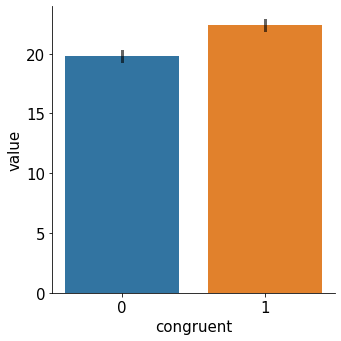

In [43]:
def ttest_for_error(error_type):
  x =x_2_1[(x_2_1[infrequnce_error] == error_type)]
  aov = AnovaRM(
    x,
    depvar='value',
    subject="participant",
    within=['congruent']
    ).fit()
  print(aov)

  display(pt.pairwise_tests(data=x, dv='value', 
                         within=['congruent'], subject="participant", effsize='eta-square'))
  x1 = x.pivot_table(index=["participant"], 
                             columns=[congruent],values="value").fillna(0)                          
  display(x1.mean())
  display(x1.std())                           

  res = stat()
  res.ttest(x1, res=[0,1], test_type=3)
  #display((x1[0]-x1[1]).mean()) 
  # display((x1[0]-x1[1]).std() / np.sqrt(np.size(x1[0])))  
  #display((x1[0]-x1[1]).std())  
  #display(x1)          
  print(res.summary)
  x1 = pd.melt(x1)
  #display(x1)
  z = sn.catplot(kind='bar', 
           data=x1,
           ci=None,
           x='congruent', y='value')
  se = [0.412,0.412]
  create_se_on_graph(z, se)

ttest_for_error('infreq_answer')

                 Anova
          F Value Num DF  Den DF Pr > F
---------------------------------------
congruent  3.9150 1.0000 30.0000 0.0571



,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,eta-square
0,congruent,0,1,True,True,-1.978643,30.0,two-sided,0.057101,1.064,0.008952


congruent
0    17.322581
1    19.258065
dtype: float64

congruent
0     8.478943
1    11.638922
dtype: float64


Paired t-test 

------------------  ----------
Sample size         31
Difference Mean     -1.93548
t                   -1.97864
Df                  30
P-value (one-tail)   0.0285506
P-value (two-tail)   0.0571012
Lower 95.0%         -3.93321
Upper 95.0%          0.0622412
------------------  ----------


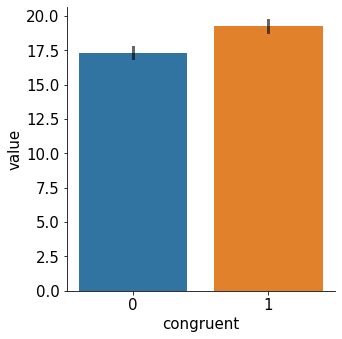

In [44]:
ttest_for_error('wides_answer')

## % of (error say no image) / (say no image) 

Ttest_1sampResult(statistic=-0.7944139443828651, pvalue=0.43319423021580616)


Paired t-test 

------------------  ----------
Sample size         31
Difference Mean     -0.0270856
t                   -0.794414
Df                  30
P-value (one-tail)   0.216597
P-value (two-tail)   0.433194
Lower 95.0%         -0.096717
Upper 95.0%          0.0425458
------------------  ----------


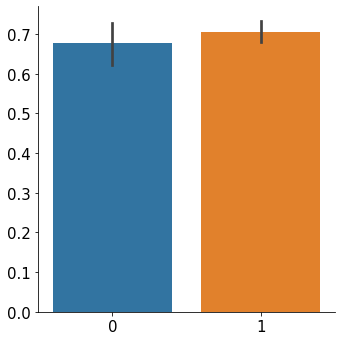

In [45]:
p = dfs2_1_accurcy_3_way_copy_without_precent
true_answer_0 = pd.DataFrame(p[(0, 'infrequent', 'true_answer')])
error_0 = pd.DataFrame(p[(0, 'widespread', 'infreq_answer')])
stroop_0 = (error_0.values / (error_0.values + true_answer_0.values)).reshape(1, -1).flatten()

true_answer_1 = pd.DataFrame(p[(1, 'infrequent', 'true_answer')])
error_1 = pd.DataFrame(p[(1, 'widespread', 'infreq_answer')])
stroop_1 = (error_1.values / (error_1.values + true_answer_1.values)).reshape(1, -1).flatten()

present_of_uncertanty = pd.DataFrame([stroop_0, stroop_1]).T

uncertanty_all = pd.DataFrame(((error_1.values+error_0.values) / (error_1.values + true_answer_1.values +
                                                error_0.values + true_answer_0.values)).reshape(1, -1).flatten())
uncertanty_all=uncertanty_all.rename(columns = {0:'uncertanty'})
uncertanty_all = pd.DataFrame(p[participant]).merge(uncertanty_all, left_index=True, right_index=True)
res = stat()
res.ttest(present_of_uncertanty, res=[0,1], test_type=3)  
display(ttest_1samp(a=stroop_0-stroop_1, popmean=0) )           
print(res.summary)
sn.catplot(kind='bar',
           data=present_of_uncertanty)

corraltion 

## coraltion with question

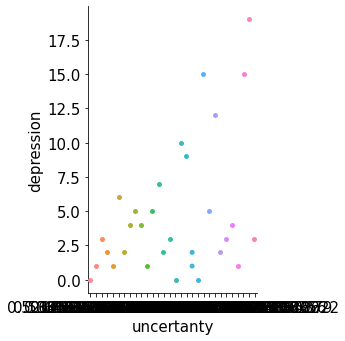

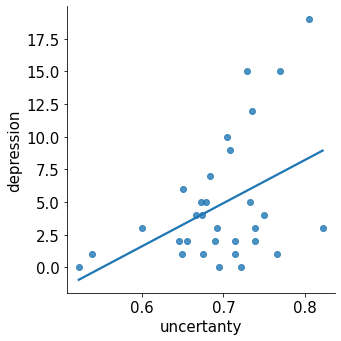

depression


(0.4393040210069426, 0.013413570261740882)

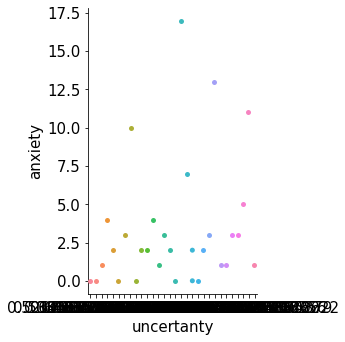

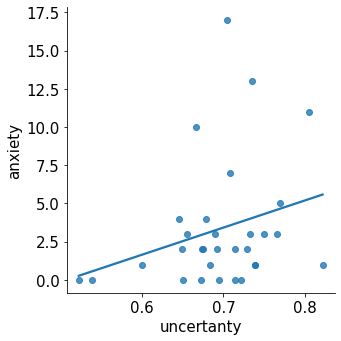

anxiety


(0.2762587179155499, 0.13248185367392726)

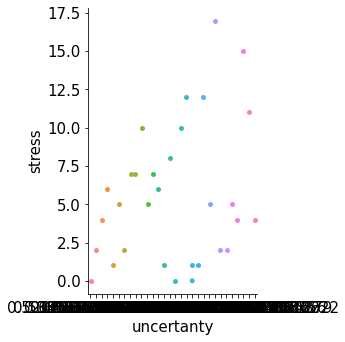

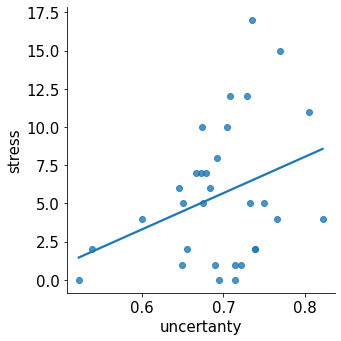

stress


(0.3374058893841084, 0.06341763359662252)

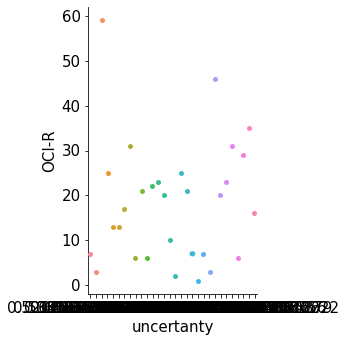

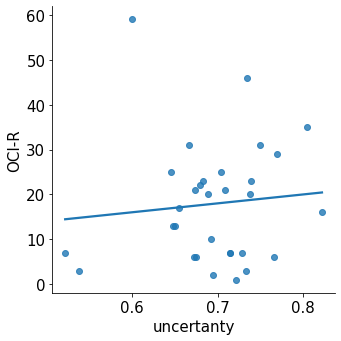

OCI-R


(0.0955895307326512, 0.6089850758075217)

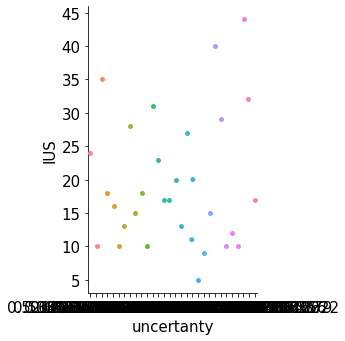

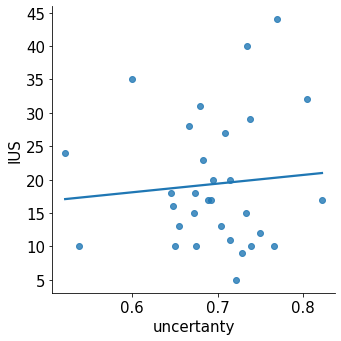

IUS


(0.08618536090395375, 0.6447987960173253)

In [46]:
def corraltion(data, name):
  path_f = path + "/inhibitory_control&uncertainty&check_score.xlsx"
  QR_score = pd.concat([pd.read_excel(path_f, sheet_name='Sheet0',na_values="").fillna(value = 0)])
  for i in [52, 20, 41, 12, 13]:
    QR_score = QR_score.drop(QR_score[QR_score['participant'] == i].index)
  QR_score = QR_score.sort_values(by=['participant'], ignore_index=True)
  a = pd.DataFrame(QR_score).merge(data, how='left', on='participant')
  for i in ['depression', 'anxiety', 'stress', 'OCI-R', 'IUS']:
      test_value = i
      # a=a.rename(columns = {'depression':'Depression'})
      # a=a.rename(columns = {'uncertanty':'Uncertainty Propagation'})
      # name = 'Uncertainty Propagation'
      # test_value = 'Depression'
      sn.catplot(data=a,
                 x=name, y=test_value)
      sn.lmplot(data=a, ci = None,
                 x=name, y=test_value)
      #sn.regplot(data=a, ci=None,
      #          x='Uncertainty Propagation', y=test_value)
    
      plt.show()
      print(i)
      display(pearsonr(a[test_value], a[name]))
corraltion(uncertanty_all, 'uncertanty' )   

## corraltion - for time - say no image 

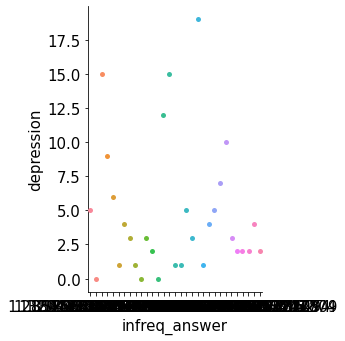

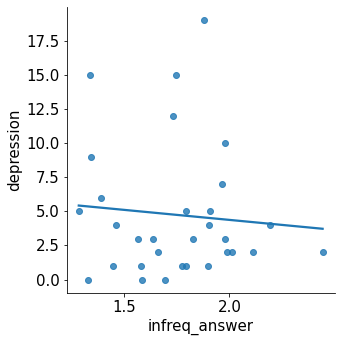

depression


(-0.08431266814842925, 0.6520281063327752)

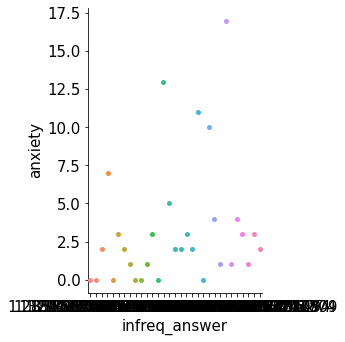

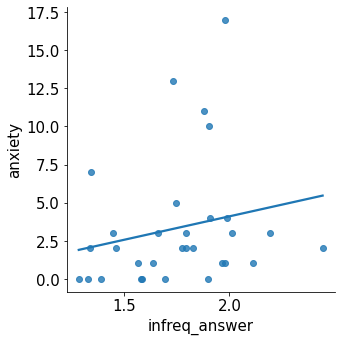

anxiety


(0.20700092465233685, 0.263855325109982)

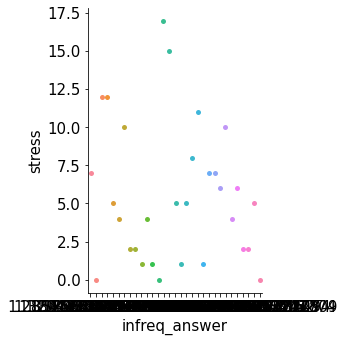

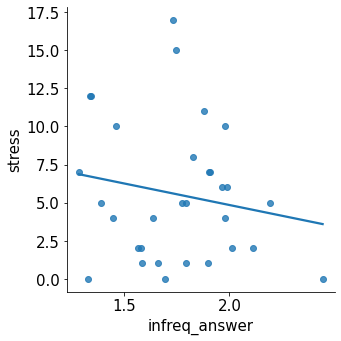

stress


(-0.17373347581758075, 0.3499474768631214)

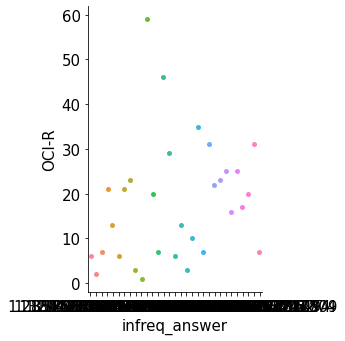

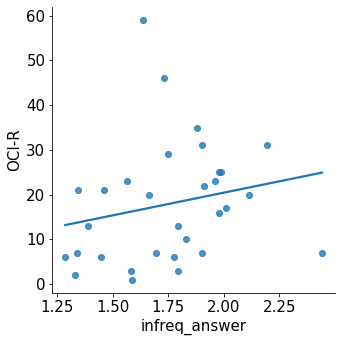

OCI-R


(0.2099643576553325, 0.25692660175332577)

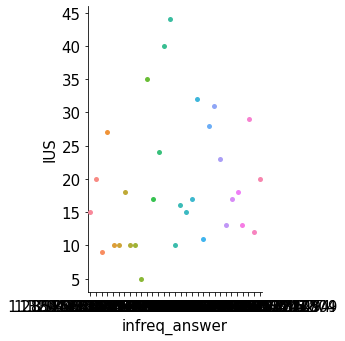

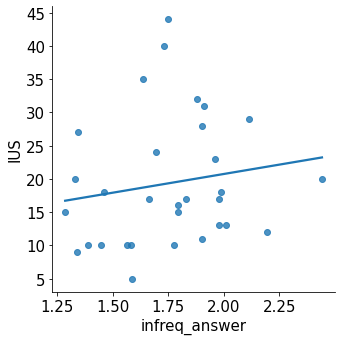

IUS


(0.1604372120364953, 0.3885924094481937)

In [47]:
dfs2_1_copy = dfs2_1.copy()
dfs2_1_copy[infrequnce_error] = np.select([(dfs2_1_copy[experiment] == "uncertainty") &
                                        (dfs2_1_copy[click_name] == "three_right")], ["infreq_answer"], default="wides_answer")
########### for test only error uncertanty, take the next line
#dfs2_1_copy.loc[dfs2_1["test_uncertainty_anser_currect"] == True, infrequnce_error] = "true_answer"
dfs2_1_time_uncertanty = (dfs2_1_copy.pivot_table(index=["participant"], 
                                columns=[infrequnce_error], values=["test_mouse_anser_rual.time"],
                                aggfunc=[np.mean]))
dfs2_1_time_uncertanty.columns = dfs2_1_time_uncertanty.columns.droplevel(level=[0, 1])
########### for test only error uncertanty, take the next line
# dfs2_1_time_uncertanty.drop('true_answer', inplace=True, axis=1)
dfs2_1_time_uncertanty.drop('wides_answer', inplace=True, axis=1)
corraltion(dfs2_1_time_uncertanty, 'infreq_answer')  

## corraltion - for time - all kind error

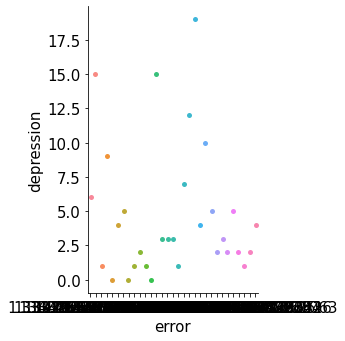

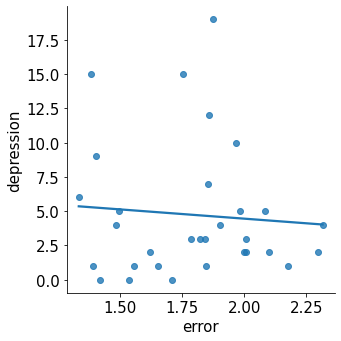

depression


(-0.07664577105510484, 0.681943441841538)

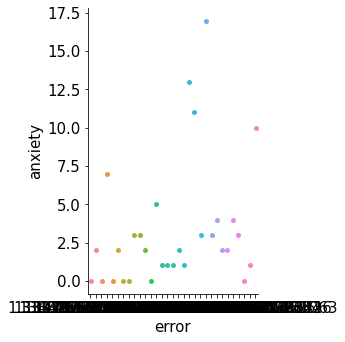

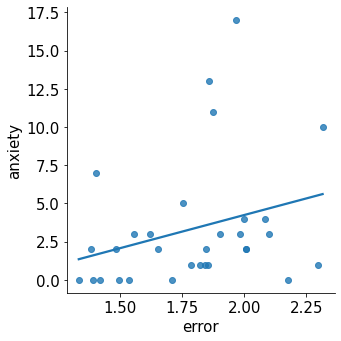

anxiety


(0.28809958719892853, 0.11602334422525443)

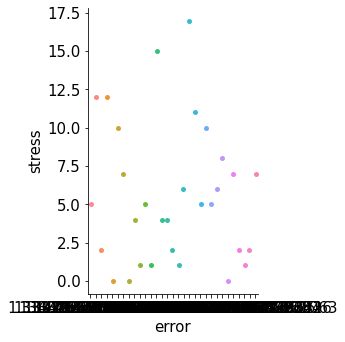

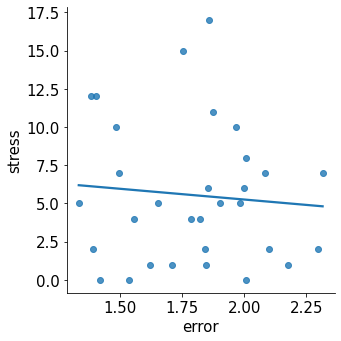

stress


(-0.08523507840083347, 0.6484633273147241)

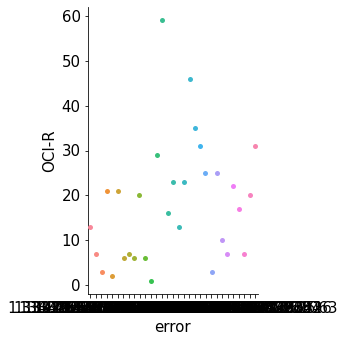

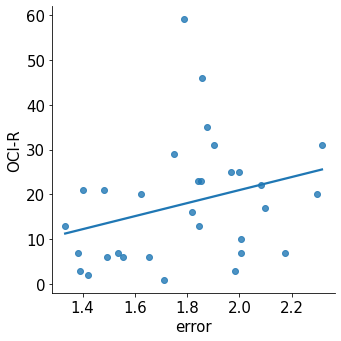

OCI-R


(0.2974113789395752, 0.10418878532180066)

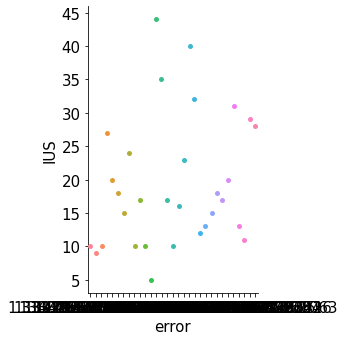

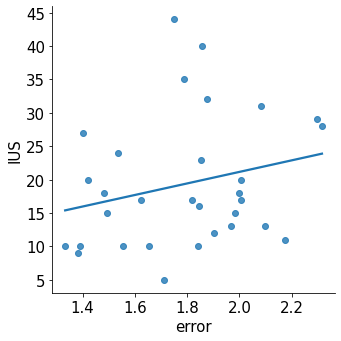

IUS


(0.24395861576310476, 0.18597756769138038)

In [48]:
dfs2_1_copy[infrequnce_error] = np.select([(dfs2_1_copy[experiment] == "uncertainty") &
                                        (dfs2_1_copy[click_name] == "three_right")], ["error"], default="error")
dfs2_1_copy.loc[dfs2_1["test_uncertainty_anser_currect"] == True, infrequnce_error] = "true_answer"
dfs2_1_time_uncertanty = (dfs2_1_copy.pivot_table(index=["participant"], 
                                columns=[infrequnce_error], values=["test_mouse_anser_rual.time"],
                                aggfunc=[np.mean]))
dfs2_1_time_uncertanty.columns = dfs2_1_time_uncertanty.columns.droplevel(level=[0, 1])
dfs2_1_time_uncertanty.drop('true_answer', inplace=True, axis=1)
dfs2_1_time_uncertanty
corraltion(dfs2_1_time_uncertanty, 'error')  

## corraltion - accurcy - after inhibtion

,uncertanty,participant
0,-0.012158,15
1,-0.006033,16
2,0.083595,17
3,-0.047403,18
4,0.050000,19
5,-0.055556,21
6,-0.303030,22
7,-0.083333,23
8,0.004913,24
9,-0.113054,25


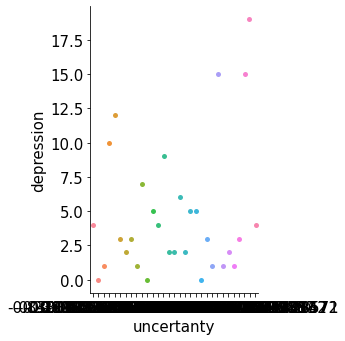

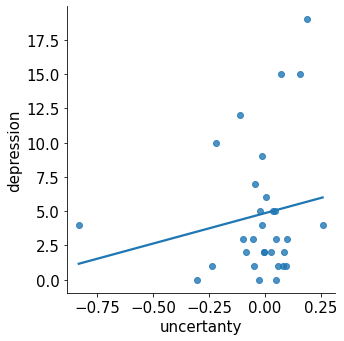

depression


(0.17323343605946945, 0.35135752988104624)

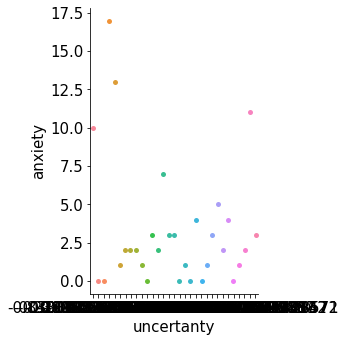

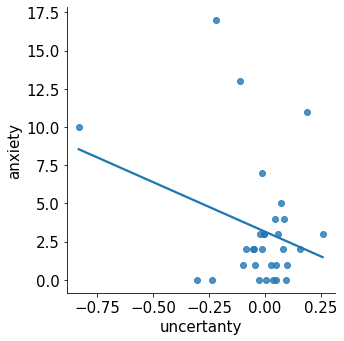

anxiety


(-0.2960668439302893, 0.10583904344993662)

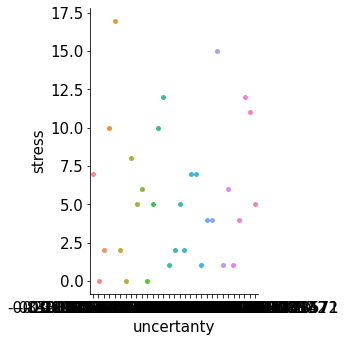

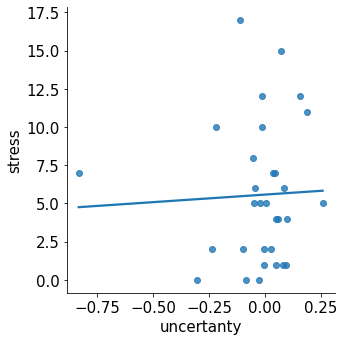

stress


(0.04125360322019063, 0.8256024930545303)

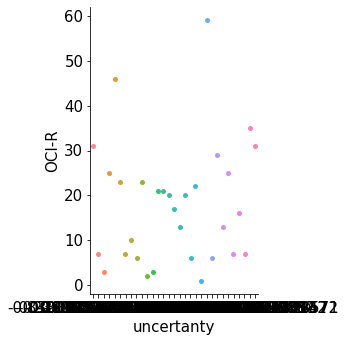

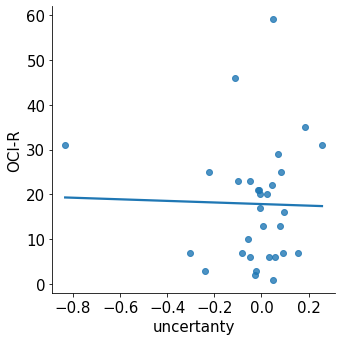

OCI-R


(-0.02484583826039762, 0.8944534070937946)

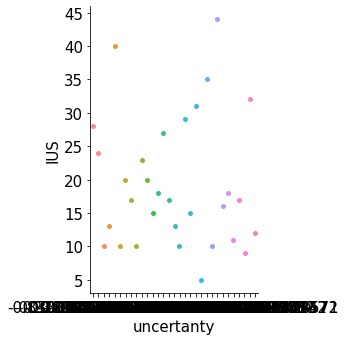

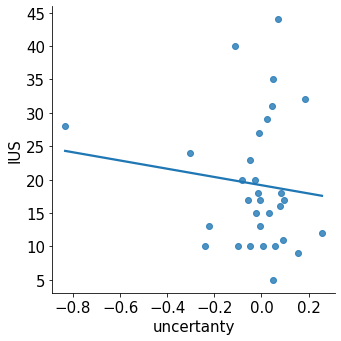

IUS


(-0.11978693693801579, 0.5209670982232963)

In [49]:
diffAccurcy = pd.DataFrame(stroop_0 - stroop_1)
diffAccurcy=diffAccurcy.rename(columns = {0:'uncertanty'})
diffAccurcy['participant'] = uncertanty_all['participant']
display(diffAccurcy)
corraltion(diffAccurcy, 'uncertanty')                         

# part 2.2

## accuracy as function of common - data

In [50]:
dfs2_2[dfs2_2["test_uncertainty_anser_currect"] == True].pivot_table(index=["participant"], 
                                                  columns=[common, congruent],values=[], aggfunc=[len])

len                   
common      infrequent     widespread    
congruent            0   1          0   1
participant                              
15                   4   5         32  32
16                   9   9         44  45
17                   6  10         31  32
18                   5   7         28  25
19                   4   9         31  33
21                   4   7         32  40
22                   7   8         37  41
23                   9   7         33  42
24                  10   7         43  49
25                   2   3         24  36
26                  12   4         31  30
27                   5   7         30  38
28                   9   8         43  36
29                   6   5         26  24
30                   4   8         31  32
31                   7   8         26  24
32                   7   9         33  36
36                   9  10         27  31
37                  15  10         47  53
38                   9   5         21  29
39                  10   8         33  44
40                   2   1         31  31
43                   6   4         29  29
44                  10  10         41  51
45                   5   7         51  39
46                  14   4         38  34
47                   9   6         25  33
48                   3   4         35  35
49                   8   5         25  29
50                  10  12         40  31
51                   6   7         18  33

## error as function of common

mean       std
congruent common                         
0         infrequent   9.096774  2.797080
          widespread  31.161290  7.532582
1         infrequent  10.000000  2.422120
          widespread  32.032258  6.467786

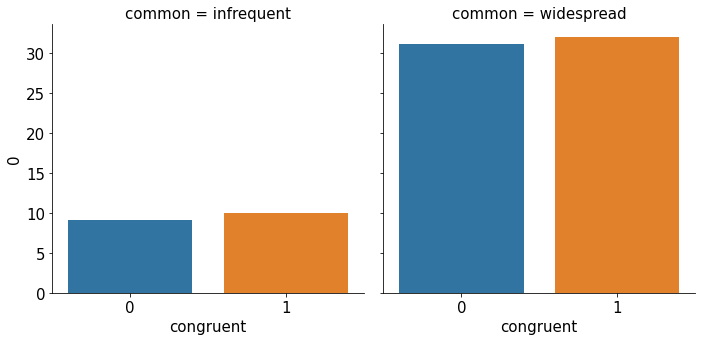

In [51]:
dfs2_2_accurcy = dfs2_2[dfs2_2["test_uncertainty_anser_currect"] == False].pivot_table(index=["participant"], 
                                columns=[congruent, common, "test_uncertainty_anser_currect"], values=[],
                                aggfunc=[len])
dfs2_2_accurcy.columns = dfs2_2_accurcy.columns.droplevel([0, 3])

display(pd.DataFrame({"mean":dfs2_2_accurcy.mean(), "std": dfs2_2_accurcy.std()}))
sn.catplot(kind='bar', data=dfs2_2_accurcy.mean().reset_index(),
           col="common", x='congruent', y=0)

## add infrequnce error to data

In [52]:
def add_error_of_infrequnce(file):
    file[infrequnce_error] = np.select([(file[experiment] == "certainty") &
                                        ((file[click_name] == "two_up")
                                         | (file[click_name] == "one_up") | (file[click_name] == "three_up") |
                                         (file[click_name] == "four_up") | (file[click_name] == "one_down")
                                         | (file[click_name] == "two_down") | (file[click_name] == "three_down"))],
                                       ["infreq_answer"], default="wides_answer")
    return file
dfs2_2 = add_error_of_infrequnce(dfs2_2)
display(dfs2_2)


,word,letterColor,corrAns,congruent,imageTrain,true_shaps,corrAnsRual,common,common_new,experiment,...,date,expName,psychopyVersion,frameRate,test_certainty_anser_time,finalClickTime,text_5.started,text_5.stopped,certainty,infrequnce_error
221,ירוק,green,x,1,Image_uncertainty_2//image169_alemnt14.jpg,14.jpg,two_right,widespread,True,certainty,...,2021_Dec_29_1834,untitled_2,2020.2.6,59.813621,2.102231,2.100589,2128.548944,None,NaN,wides_answer
222,ירוק,red,z,0,Image_uncertainty_2//image44_alemnt12.jpg,12.jpg,four_left,widespread,False,certainty,...,2021_Dec_29_1834,untitled_2,2020.2.6,59.813621,2.758818,2.754142,2138.085816,None,NaN,wides_answer
223,אדום,red,z,1,Image_uncertainty_2//image138_alemnt9.jpg,9.jpg,one_left,widespread,False,certainty,...,2021_Dec_29_1834,untitled_2,2020.2.6,59.813621,1.637071,1.634018,2146.112937,None,NaN,wides_answer
224,ירוק,red,z,0,Image_uncertainty_2//image86_alemnt8.jpg,8.jpg,four_down,widespread,False,certainty,...,2021_Dec_29_1834,untitled_2,2020.2.6,59.813621,2.041378,2.036890,2154.532308,None,NaN,wides_answer
225,כחול,blue,c,1,Image_uncertainty_2//image119_alemnt2.jpg,2.jpg,two_up,infrequent,False,certainty,...,2021_Dec_29_1834,untitled_2,2020.2.6,59.813621,1.319745,1.318806,2162.261330,None,NaN,infreq_answer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
428,כחול,blue,c,1,Image_uncertainty_2//image167_alemnt11.jpg,11.jpg,three_left,widespread,NaN,certainty,...,2022_Jul_19_1932,untitled_2,2020.2.6,60.047293,1.432945,1.432501,4093.819736,None,NaN,infreq_answer
429,כחול,red,z,0,Image_uncertainty_2//image76_alemnt14.jpg,14.jpg,two_right,widespread,NaN,certainty,...,2022_Jul_19_1932,untitled_2,2020.2.6,60.047293,1.000705,0.999628,4100.880304,None,NaN,wides_answer
430,כחול,red,z,0,Image_uncertainty_2//image58_alemnt13.jpg,13.jpg,one_right,widespread,NaN,certainty,...,2022_Jul_19_1932,untitled_2,2020.2.6,60.047293,2.134903,2.133987,4109.273416,None,NaN,wides_answer
431,ירוק,red,z,0,Image_uncertainty_2//image80_alemnt10.jpg,10.jpg,two_left,widespread,NaN,certainty,...,2022_Jul_19_1932,untitled_2,2020.2.6,60.047293,1.285299,0.000000,4116.917265,None,NaN,wides_answer


##anova kind of choose shpae

,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,ng2,eps
0,common,14591.387931,1,28,14591.387931,471.852131,4.598092e-19,4.598092e-19,0.731549,1.0
1,infrequnce_error,1212.284483,1,28,1212.284483,16.754464,3.271113e-04,3.271113e-04,0.184609,1.0
2,common * infrequnce_error,95.043103,1,28,95.043103,2.580672,1.193961e-01,1.193961e-01,0.017441,1.0


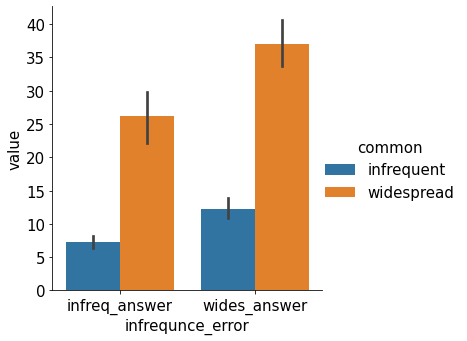

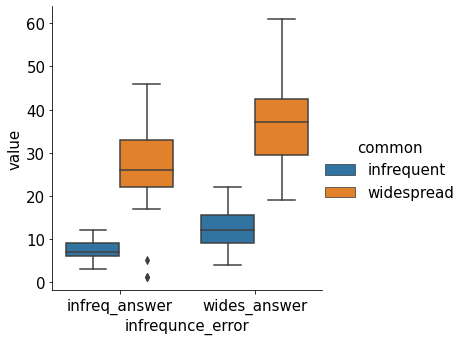

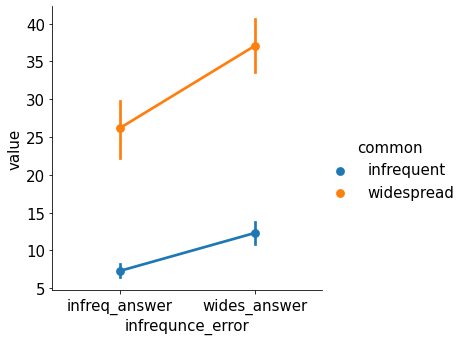

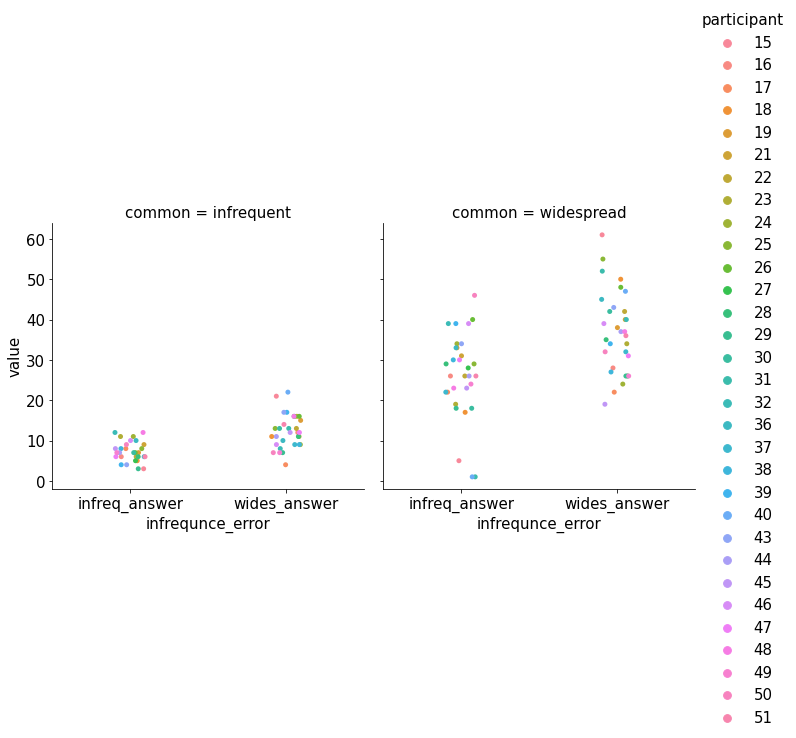

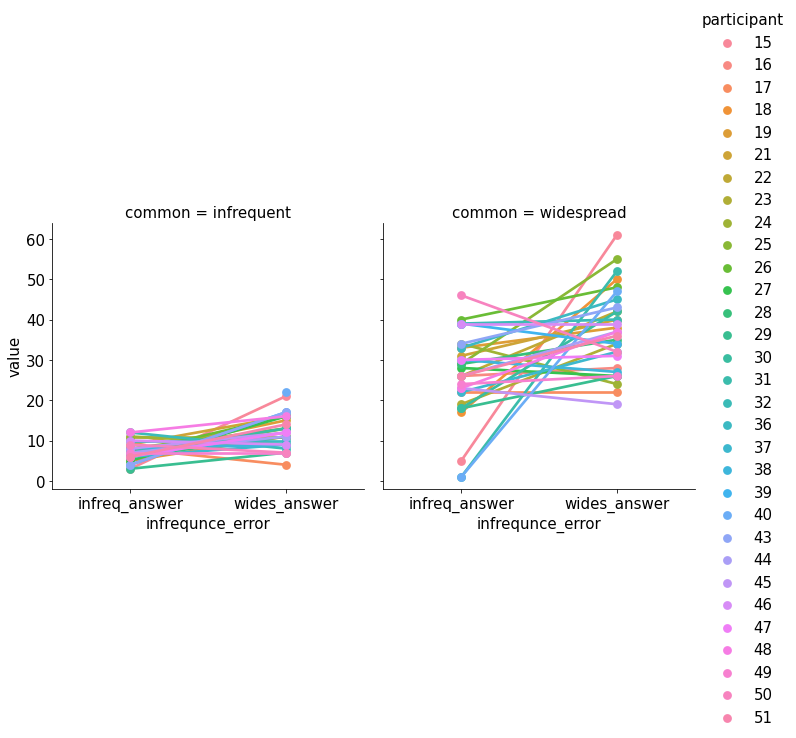

In [53]:
dfs2_2_accurcy = dfs2_2[dfs2_2["test_uncertainty_anser_currect"] == False].pivot_table(index=["participant"], 
                                columns=[common, infrequnce_error], values=[],
                                aggfunc=[len])
dfs2_2_accurcy.columns = dfs2_2_accurcy.columns.droplevel(level=[0])                          
dfs2_2_accurcy = dfs2_2_accurcy.reset_index()
dfs2_2_accurcy_melt = pd.melt(dfs2_2_accurcy, id_vars=[dfs2_2_accurcy.columns[0]],
              value_vars=[dfs2_2_accurcy.columns[i] for i in range(1,len(dfs2_2_accurcy.columns))])
dfs2_2_accurcy_melt = dfs2_2_accurcy_melt.rename(columns={("participant", ''): "participant"})
display(pt.rm_anova(dv='value', within=['common', 'infrequnce_error'], data=dfs2_2_accurcy_melt, subject="participant",
             detailed=True))

anovagraphs(dfs2_2_accurcy_melt, x_val=infrequnce_error)

## anova 3-way

In [54]:
dfs2_2.loc[dfs2_2["test_uncertainty_anser_currect"] == True, infrequnce_error] = "true_answer"
dfs2_2_accurcy_3_way = dfs2_2.pivot_table(
                                index=["participant"], 
                                columns=[congruent, common, infrequnce_error], values=[],
                                aggfunc=[len], fill_value=0).fillna(0)
u = dfs2_2.pivot_table(
                                index=["participant"], 
                                columns=[common, infrequnce_error], values=[],
                                aggfunc=[len], fill_value=0).fillna(0)

u.columns = u.columns.droplevel(level=[0])
u = u.reset_index()

dfs2_2_accurcy_3_way.columns = dfs2_2_accurcy_3_way.columns.droplevel(level=[0])
dfs2_2_accurcy_3_way = dfs2_2_accurcy_3_way.reset_index()

len_of_answer_common = dfs2_2.pivot_table(index=["participant"], 
                                columns=[congruent, common], values=[],
                                aggfunc=[len], fill_value=0).fillna(0)
len_of_answer_common.columns = len_of_answer_common.columns.droplevel(level=[0])


s1 = pd.DataFrame(u[('widespread', 'true_answer')])
u[('widespread', 'true_answer')]  = (s1.values / (pd.DataFrame(len_of_answer_common[(0, "widespread")]).values + pd.DataFrame(len_of_answer_common[(1, "widespread")]).values))
s1 = pd.DataFrame(u[('infrequent', 'true_answer')])
u[('infrequent', 'true_answer')]  = (s1.values / (pd.DataFrame(len_of_answer_common[(0, "infrequent")]).values + pd.DataFrame(len_of_answer_common[(1, "infrequent")]).values))
print("mean:", u.xs(('true_answer'), level=infrequnce_error, axis=1).mean(axis=0))
print("std:", u.xs(('true_answer'), level=infrequnce_error, axis=1).std(axis=0))
#display(u.xs(('true_answer'), level=infrequnce_error, axis=1))


dfs2_2_accurcy_3_way_copy_without_precent = dfs2_2_accurcy_3_way.copy()
x = dfs2_2_accurcy_3_way
s1 = pd.DataFrame(x[(0, 'widespread', 'true_answer')])
x[(0, 'widespread', 'true_answer')]  = (s1.values / pd.DataFrame(len_of_answer_common[(0, "widespread")]).values)
s2 = pd.DataFrame(x[(1, 'widespread', 'true_answer')])
x[(1, 'widespread',   'true_answer')] = (s2.values / pd.DataFrame(len_of_answer_common[(1, "widespread")]).values)
s1 = pd.DataFrame(x[(0, 'infrequent', 'true_answer')])
x[(0, 'infrequent', 'true_answer')]  = (s1.values / pd.DataFrame(len_of_answer_common[(0, "infrequent")]).values)
s2 =pd.DataFrame(x[(1, 'infrequent', 'true_answer')])
x[(1, 'infrequent',   'true_answer')] = (s2.values / pd.DataFrame(len_of_answer_common[(1, "infrequent")]).values)

#display((dfs2_2_accurcy_3_way.xs(('true_answer'), level=infrequnce_error, axis=1)))

#display((dfs2_2_accurcy_3_way.xs(('infreq_answer'), level=infrequnce_error, axis=1)))
#display((dfs2_2_accurcy_3_way.xs(('wides_answer'), level=infrequnce_error, axis=1)))
#display(dfs2_2_accurcy_3_way)

# find mean
# u = dfs2_2_accurcy_3_way.xs(('true_answer'), level=infrequnce_error, axis=1)
# display(u)

# display(u[(1, "infrequent")] + u[(0, "infrequent")])
# display(u[(1, "widespread")] + u[(0, "widespread")])


dfs2_2_accurcy_melt_3_way = pd.melt(dfs2_2_accurcy_3_way, id_vars=[dfs2_2_accurcy_3_way.columns[0]],
              value_vars=[dfs2_2_accurcy_3_way.columns[i] for i in range(1, len(dfs2_2_accurcy_3_way.columns))])

dfs2_2_accurcy_melt_3_way = dfs2_2_accurcy_melt_3_way.rename(columns={("participant", '', ''): "participant"})
dfs2_2_accurcy_melt_3_way = pd.concat([dfs2_2_accurcy_melt_3_way], ignore_index=True)

aov = AnovaRM(
    dfs2_2_accurcy_melt_3_way[(dfs2_2_accurcy_melt_3_way[infrequnce_error] == 'true_answer')], 
    depvar='value',
    subject="participant",
    within=['congruent', 'common']
    ).fit()
print(aov)



mean: common
infrequent    0.421974
widespread    0.518254
dtype: float64
std: common
infrequent    0.115839
widespread    0.069975
dtype: float64
                    Anova
                 F Value Num DF  Den DF Pr > F
----------------------------------------------
congruent         0.2924 1.0000 30.0000 0.5927
common           19.3200 1.0000 30.0000 0.0001
congruent:common  1.6413 1.0000 30.0000 0.2100



In [55]:
mean = dfs2_2.pivot_table(index=["participant"],columns=infrequnce_error,aggfunc=[len], values=[])
mean.columns = mean.columns.droplevel(level=[0])
print(mean.mean())
print(mean.std())
display(ttest_1samp(mean, 6.6))
res = stat()
res.ttest(df=mean, test_type=1, mu=7.1, res='true_answer')
print(res.summary)

infrequnce_error
infreq_answer    32.967742
true_answer      82.354839
wides_answer     49.322581
dtype: float64
infrequnce_error
infreq_answer    12.702976
true_answer      16.584226
wides_answer     12.825462
dtype: float64


Ttest_1sampResult(statistic=array([11.55708532, 25.4329075 , 18.5466429 ]), pvalue=array([1.41962601e-12, 7.38884132e-22, 5.50644214e-18]))


One Sample t-test 

------------------  ------------
Sample size         31
Mean                82.3548
t                   25.265
Df                  30
P-value (one-tail)   4.46783e-22
P-value (two-tail)   8.93565e-22
Lower 95.0%         76.2717
Upper 95.0%         88.438
------------------  ------------


## step 1: anova for true answer : common & conguent (%)

                    Anova
                 F Value Num DF  Den DF Pr > F
----------------------------------------------
congruent         0.2924 1.0000 30.0000 0.5927
common           19.3200 1.0000 30.0000 0.0001
congruent:common  1.6413 1.0000 30.0000 0.2100



,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,ng2,eps
0,congruent,0.003083,1,30,0.003083,0.29238,0.592692,0.592692,0.001837,1.0
1,common,0.284168,1,30,0.284168,19.31998,0.000128,0.000128,0.144999,1.0
2,congruent * common,0.014465,1,30,0.014465,1.64127,0.209966,0.209966,0.008559,1.0


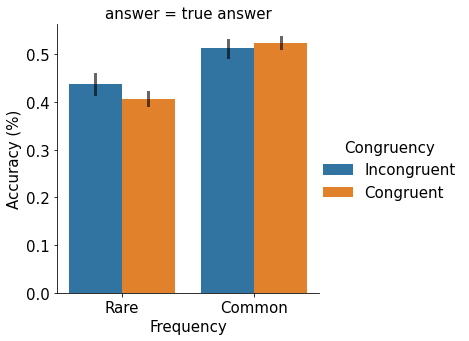

In [56]:
dfs2_2_accurcy_melt_3_way_copy = dfs2_2_accurcy_melt_3_way.copy()
aov = AnovaRM(
    dfs2_2_accurcy_melt_3_way_copy[(dfs2_2_accurcy_melt_3_way_copy[infrequnce_error] == 'true_answer')],
    depvar='value',
    subject="participant",
    within=['congruent', 'common']
    ).fit()
print(aov)
display(pt.rm_anova(dv='value', within=['congruent', 'common'],
  data=dfs2_2_accurcy_melt_3_way_copy[(dfs2_2_accurcy_melt_3_way_copy[infrequnce_error] == 'true_answer')],
  subject="participant", detailed=True))

x=dfs2_2_accurcy_melt_3_way_copy.rename(columns = {'value':'Accuracy (%)'})
x=x.rename(columns = {infrequnce_error:'answer'})
x.loc[x["answer"] == 'true_answer',"answer"] = 'true answer'
x.loc[x["congruent"] == 0.0,"congruent"] = 'Incongruent'
x.loc[x["congruent"] == 1.0, "congruent"] = 'Congruent'
x=x.rename(columns = {congruent:'Congruency'})

x.loc[x["common"] == 'widespread',"common"] = 'Common'
x.loc[x["common"] == 'infrequent', "common"] = 'Rare'

x=x.rename(columns = {common:'Frequency'})


z = sn.catplot(kind='bar',
           data= x[x['answer'] == 'true answer'], ci=None,
           x='Frequency', col='answer', hue='Congruency', y='Accuracy (%)')

se = [0.02091, 0.01776,0.01422, 0.01193]
create_se_on_graph(z, se)

## steps 2: t-test for widsp & true answer : conguent (%)

                 Anova
          F Value Num DF  Den DF Pr > F
---------------------------------------
congruent  0.6274 1.0000 30.0000 0.4345


Paired t-test 

------------------  ----------
Sample size         31
Difference Mean     -0.0116284
t                   -0.792074
Df                  30
P-value (one-tail)   0.217268
P-value (two-tail)   0.434536
Lower 95.0%         -0.0416107
Upper 95.0%          0.018354
------------------  ----------


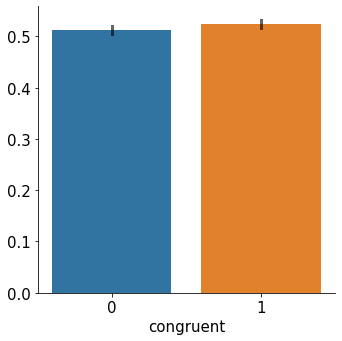

In [57]:
def ttest_true_answer_part_2(infrequent):
  dfs_2_2_true_answer_common_a = dfs2_2_accurcy_melt_3_way_copy[(dfs2_2_accurcy_melt_3_way_copy[infrequnce_error] == 'true_answer') &
                           (dfs2_2_accurcy_melt_3_way_copy[common] == infrequent)]
  aov = AnovaRM(
    dfs_2_2_true_answer_common_a,
    depvar='value',
    subject="participant",
    within=['congruent']
    ).fit()
  print(aov)
  dfs_2_2_true_answer_common = dfs_2_2_true_answer_common_a.pivot_table(index=["participant"], 
                                columns=[congruent],values="value").fillna(0)                               
  res = stat()
  res.ttest(dfs_2_2_true_answer_common, res=[0,1], test_type=3)                
  print(res.summary)
  z = sn.catplot(kind='bar', ci=None,
           data= dfs_2_2_true_answer_common)
  # standart error from file for widespread
  se = [0.00784, 0.00784]
  create_se_on_graph(z, se)

ttest_true_answer_part_2('widespread')


                 Anova
          F Value Num DF  Den DF Pr > F
---------------------------------------
congruent  0.9647 1.0000 30.0000 0.3339


Paired t-test 

------------------  ----------
Sample size         31
Difference Mean      0.0315736
t                    0.982196
Df                  30
P-value (one-tail)   0.166929
P-value (two-tail)   0.333859
Lower 95.0%         -0.0340772
Upper 95.0%          0.0972245
------------------  ----------


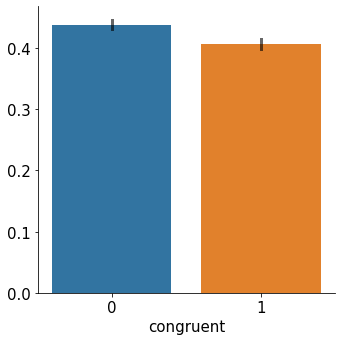

In [58]:
ttest_true_answer_part_2('infrequent')

## step 3: anova for error - widsp : kind of error & stroop

            infrequnce_error
sum  value  infreq_answer       26.161290
            wides_answer        37.032258
dtype: float64

            infrequnce_error
sum  value  infreq_answer       10.661760
            wides_answer        10.097801
dtype: float64

                         Anova
                           F Value Num DF  Den DF Pr > F
--------------------------------------------------------
congruent                   0.5189 1.0000 30.0000 0.4769
infrequnce_error           13.1098 1.0000 30.0000 0.0011
congruent:infrequnce_error  0.0228 1.0000 30.0000 0.8809



,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,ng2,eps
0,congruent,5.879032,1,30,5.879032,0.518935,0.476872,0.476872,0.001434,1.0
1,infrequnce_error,915.879032,1,30,915.879032,13.109763,0.001070,0.001070,0.182822,1.0
2,congruent * infrequnce_error,0.395161,1,30,0.395161,0.022826,0.880922,0.880922,0.000097,1.0


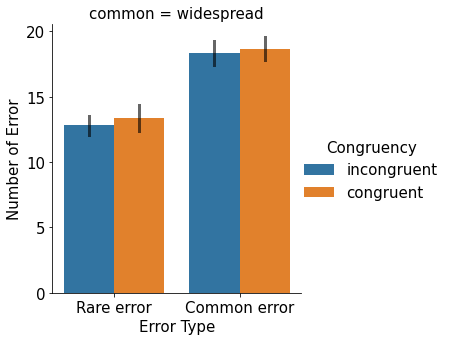

In [59]:
x_2_2 = dfs2_2_accurcy_melt_3_way[(dfs2_2_accurcy_melt_3_way['common'] == "widespread") &
                              (dfs2_2_accurcy_melt_3_way[infrequnce_error] != "true_answer")]

mean_effect_ifreq_error = x_2_2.pivot_table(index=["participant"], 
                                columns=[infrequnce_error], values=['value'],aggfunc=[sum],
                                fill_value=0)
display(mean_effect_ifreq_error.mean())
display(mean_effect_ifreq_error.std())

aov = AnovaRM(
    x_2_2,
    depvar='value',
    subject="participant",
    within=['congruent', infrequnce_error]
    ).fit()
print(aov)

display(pt.rm_anova(dv='value', within=['congruent', infrequnce_error],
  data=x_2_2,
  subject="participant", detailed=True))

x=x_2_2.rename(columns = {'value':'Number of Error'})
x=x.rename(columns = {infrequnce_error:'kind of error'})
x.loc[x['kind of error'] == 'infreq_answer',"kind of error"] = 'Rare error'
x.loc[x['kind of error'] == 'wides_answer',"kind of error"] = 'Common error'
x.loc[x["congruent"] == 0.0,"congruent"] = 'incongruent'
x.loc[x["congruent"] == 1.0, "congruent"] = 'congruent'

x.loc[x['kind of error'] == 'infreq_answer',"kind of error"] = 'Uncertainty'
x.loc[x['kind of error'] == 'wides_answer',"kind of error"] = 'Perceptual'
x.loc[x["congruent"] == 0.0,"congruent"] = 'Incongruent'
x.loc[x["congruent"] == 1.0, "congruent"] = 'Congruent' 
x=x.rename(columns = {congruent:'Congruency'})
x=x.rename(columns = {"kind of error":'Error Type'})

z = sn.catplot(kind='bar',
           data=x,
           units='participant', ci=None,
           col='common', x='Error Type', hue='Congruency', y='Number of Error')
se = [0.7487, 0.9064, 1.0042, 0.88523]
create_se_on_graph(z, se)

##step 4: ttest for error - widsp & 

                 Anova
          F Value Num DF  Den DF Pr > F
---------------------------------------
congruent  0.0780 1.0000 30.0000 0.7819


Paired t-test 

------------------  ---------
Sample size         31
Difference Mean     -0.322581
t                   -0.279276
Df                  30
P-value (one-tail)   0.390975
P-value (two-tail)   0.781949
Lower 95.0%         -2.68153
Upper 95.0%          2.03637
------------------  ---------


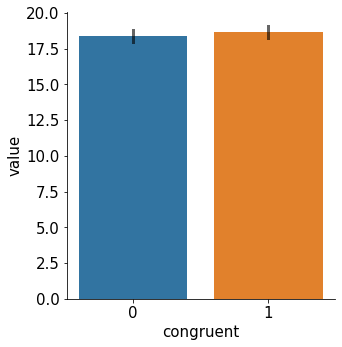

In [60]:
def ttest_error_part_2(infrequent):
  x2 = x_2_2[(x_2_2[infrequnce_error] == infrequent)]

  aov = AnovaRM(
    x2, 
    depvar='value',
    subject="participant",
    within=['congruent']
    ).fit()
  print(aov)
  x1 = x2.pivot_table(index=["participant"], 
                                columns=[congruent],values="value").fillna(0) 

  res = stat()
  res.ttest(x1, res=[0,1], test_type=3)                
  print(res.summary)

  z = sn.catplot(kind='bar', ci=None,
           data=x2,
           x='congruent', y='value')
  # standart error from file for widspread 
  se = [0.4126, 0.4126]
  create_se_on_graph(z, se)
ttest_error_part_2('wides_answer')

                 Anova
          F Value Num DF  Den DF Pr > F
---------------------------------------
congruent  0.5855 1.0000 30.0000 0.4501


Paired t-test 

------------------  ---------
Sample size         31
Difference Mean     -0.548387
t                   -0.765176
Df                  30
P-value (one-tail)   0.225072
P-value (two-tail)   0.450145
Lower 95.0%         -2.01204
Upper 95.0%          0.915271
------------------  ---------


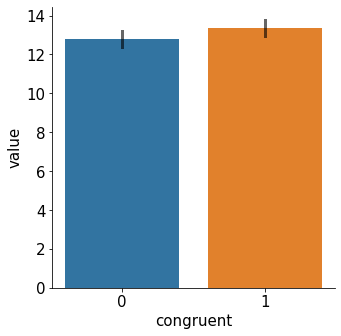

In [61]:
ttest_error_part_2('infreq_answer')

# anova part 2.1 & 2.2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


                           Anova
                               F Value Num DF  Den DF Pr > F
------------------------------------------------------------
congruent                       8.0543 1.0000 30.0000 0.0081
infrequnce_error                0.5388 1.0000 30.0000 0.4686
exp                            64.0728 1.0000 30.0000 0.0000
congruent:infrequnce_error      0.2166 1.0000 30.0000 0.6450
congruent:exp                   6.3916 1.0000 30.0000 0.0170
infrequnce_error:exp            4.0145 1.0000 30.0000 0.0542
congruent:infrequnce_error:exp  0.0564 1.0000 30.0000 0.8139



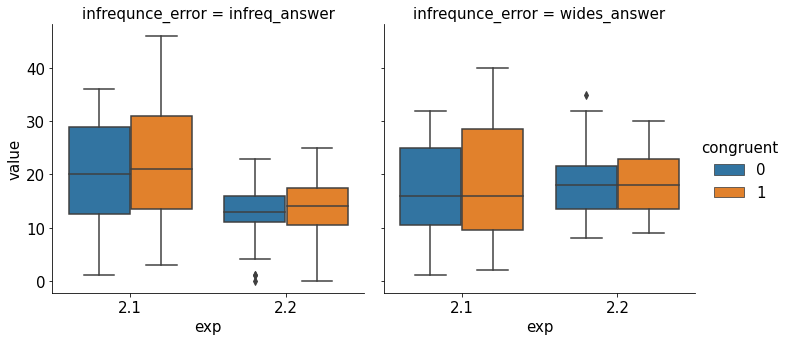

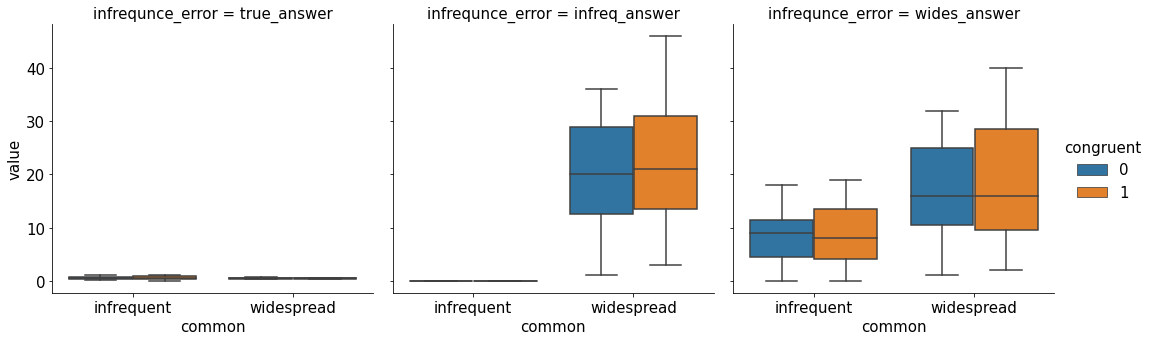

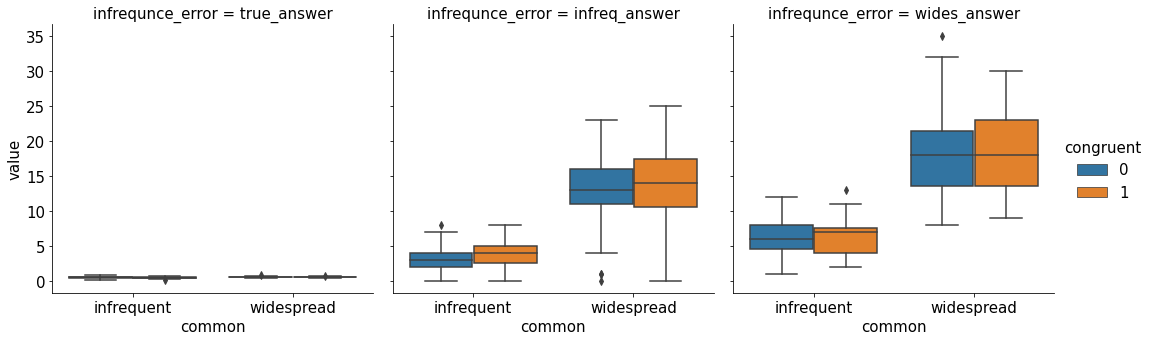

In [62]:
x_2_1['exp'] = [2.1]*len(x_2_1)
x_2_2['exp'] = [2.2]*len(x_2_2)
connect_data = pd.concat([x_2_1, x_2_2])
aov = AnovaRM(
    connect_data,
    depvar='value',
    subject="participant",
    within=[congruent, infrequnce_error, 'exp']
    ).fit()
print(aov)

sn.catplot(kind='box',
           data=connect_data,
           x='exp', col=infrequnce_error, hue='congruent', y='value')
hue_order = ['true_answer', 'infreq_answer', 'wides_answer']
sn.catplot(kind='box',
           data=dfs2_1_accurcy_melt_3_way,
           x='common', col=infrequnce_error, hue='congruent', col_order=hue_order, y='value')
sn.catplot(kind='box',
           data=dfs2_2_accurcy_melt_3_way,
          x='common', col=infrequnce_error,hue='congruent',col_order=hue_order, y='value')

